# Writing Efficient Code

## Foundations for efficiencies

### Pythonic & Non-Pythonic Code

In [2]:
# Print the list created using the Non-Pythonic approach
names = ['Jerry', 'Kramer', 'Elaine', 'George', 'Newman']
i = 0
new_list= []
while i < len(names):
    if len(names[i]) >= 6:
        new_list.append(names[i])
    i += 1
print(new_list)

['Kramer', 'Elaine', 'George', 'Newman']


In [3]:
# Print the list created by looping over the contents of names
better_list = []
for name in names:
    if len(name) >= 6:
        better_list.append(name)
print(better_list)

['Kramer', 'Elaine', 'George', 'Newman']


In [4]:
# Print the list created by using list comprehension
best_list = [name for name in names if len(name) >= 6]
print(best_list)

['Kramer', 'Elaine', 'George', 'Newman']


### Building with built-ins

In [5]:
# Create a range object that goes from 0 to 5
nums = range(6)
print(type(nums))

# Convert nums to a list
nums_list = list(nums)
print(nums_list)

# Create a new list of odd numbers from 1 to 11 by unpacking a range object
nums_list2 = [*range(1,12,2)]
print(nums_list2)

<class 'range'>
[0, 1, 2, 3, 4, 5]
[1, 3, 5, 7, 9, 11]


In [6]:
# Rewrite the for loop to use enumerate
indexed_names = []
for i,name in enumerate(names):
    index_name = (i,name)
    indexed_names.append(index_name) 
print(indexed_names)

# Rewrite the above for loop using list comprehension
indexed_names_comp = [(i,name) for i,name in enumerate(names)]
print(indexed_names_comp)

# Unpack an enumerate object with a starting index of one
indexed_names_unpack = [*enumerate(names, start=1)]
print(indexed_names_unpack)

[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]
[(1, 'Jerry'), (2, 'Kramer'), (3, 'Elaine'), (4, 'George'), (5, 'Newman')]


In [7]:
# Use map to apply str.upper to each element in names
names_map  = map(str.upper, names)

# Print the type of the names_map
print(type(names_map))

# Unpack names_map into a list
names_uppercase = [*names_map]

# Print the list created above
print(names_uppercase)

<class 'map'>
['JERRY', 'KRAMER', 'ELAINE', 'GEORGE', 'NEWMAN']


### The power of NumPy arrays

In [8]:
import numpy as np

In [12]:
names_np = np.array(['Hello', 'how', 'are', 'you'])
names_np

array(['Hello', 'how', 'are', 'you'], dtype='<U5')

In [13]:
nums = np.array(
    [[ 1,  2,  3,  4,  5],
    [ 6,  7,  8,  9, 10]]
)

In [14]:
# Print second row of nums
print(nums[1,:])

# Print all elements of nums that are greater than six
print(nums[nums > 6])

# Double every element of nums
nums_dbl = nums * 2
print(nums_dbl)

# Replace the third column of nums
nums[:,2] = nums[:,2] + 1
print(nums)

[ 6  7  8  9 10]
[ 7  8  9 10]
[[ 2  4  6  8 10]
 [12 14 16 18 20]]
[[ 1  2  4  4  5]
 [ 6  7  9  9 10]]


In [15]:
# Create a list of arrival times
arrival_times = [*range(10, 51, 10)]

print(arrival_times)

[10, 20, 30, 40, 50]


In [17]:
# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

print(new_times)

[ 7 17 27 37 47]


In [18]:
# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

# Use list comprehension and enumerate to pair guests to new times
guest_arrivals = [(names[idx],time) for idx,time in enumerate(new_times)]

print(guest_arrivals)

[('Jerry', 7), ('Kramer', 17), ('Elaine', 27), ('George', 37), ('Newman', 47)]


In [21]:
def welcome_guest(lst: list) -> list:
    '''
    welcome_guest _summary_

    Args:
        lst (list): accepts a list of names

    Returns:
        list: list of tuples, having index and names
    '''
    return [*enumerate(lst)]

# Create a list of arrival times
arrival_times = [*range(10,60,10)]

# Convert arrival_times to an array and update the times
arrival_times_np = np.array(arrival_times)
new_times = arrival_times_np - 3

# Use list comprehension and enumerate to pair guests to new times
guest_arrivals = [(names[i],time) for i,time in enumerate(new_times)]

# Map the welcome_guest function to each (guest,time) pair
welcome_map = map(welcome_guest, guest_arrivals)

guest_welcomes = [*welcome_map]
print(*guest_welcomes, sep='\n')

[(0, 'Jerry'), (1, 7)]
[(0, 'Kramer'), (1, 17)]
[(0, 'Elaine'), (1, 27)]
[(0, 'George'), (1, 37)]
[(0, 'Newman'), (1, 47)]


In [20]:
welcome_guest()

[(0, 'Jerry'), (1, 'Kramer'), (2, 'Elaine'), (3, 'George'), (4, 'Newman')]

## Timing and profiling code

### Examining runtime

In [22]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex 

In [24]:
import numpy as np
%timeit rand_nums = np.random.rand(1000)

11.7 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
%timeit -r2 -n10 rand_nums = np.random.rand(1000)

The slowest run took 5.25 times longer than the fastest. This could mean that an intermediate result is being cached.
70.9 µs ± 48.3 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [29]:
%%timeit
nums = []
for _ in range(100):
    nums.append(_)
# print(len(nums))    

3.46 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
times = %timeit -o -r2 -n10 rand_nums = np.random.rand(1000)
print(times)

The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached.
59.9 µs ± 40.4 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)
59.9 µs ± 40.4 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [32]:
times.timings

[0.00010037000756710768, 1.9499997142702342e-05]

In [33]:
print(times.best, times.worst)

1.9499997142702342e-05 0.00010037000756710768


In [34]:
%timeit formal_dict = dict()

54.4 ns ± 5.14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [36]:
%timeit literal_dict = {}

30.3 ns ± 4.82 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [37]:
%timeit list()

58.2 ns ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [38]:
%timeit []

24.6 ns ± 2.66 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


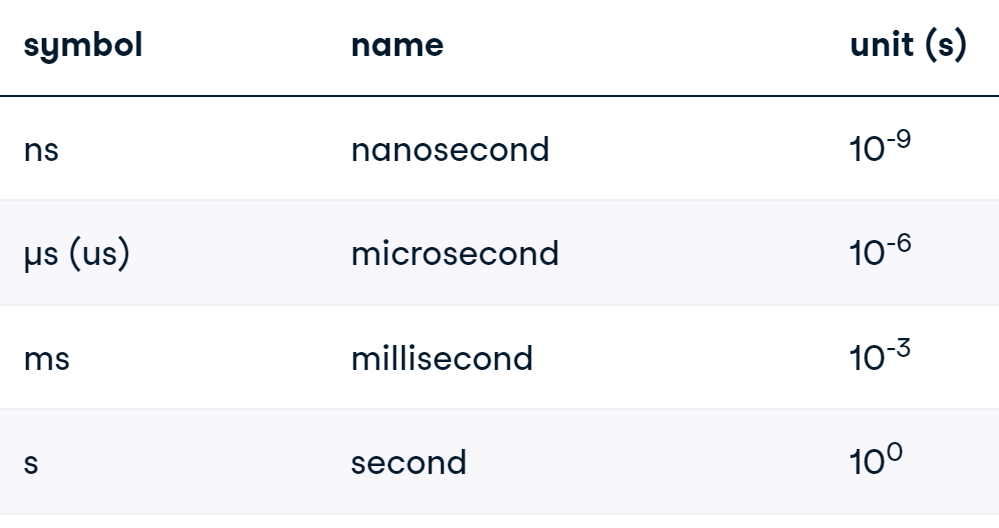

In [40]:
# Create a list of integers (0-50) using list comprehension
nums_list_comp = [num for num in range(51)]
print(nums_list_comp)
# Create a list of integers (0-50) by unpacking range
nums_unpack = [*range(51)]
print(nums_unpack)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


### Code Profiling for Runtime

In [41]:
!pip install line_profiler

   ---------------------------------------- 0.0/123.6 kB ? eta -:--:--
   ---------------------------------------  122.9/123.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 123.6/123.6 kB 2.4 MB/s eta 0:00:00


In [43]:
def convert_units(heroes, heights, weights):
    new_hts = [ht * 0.39370  for ht in heights]
    new_wts = [wt * 2.20462  for wt in weights]

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

In [46]:
heroes = ['A-Bomb',
 'Abe Sapien',
 'Abin Sur',
 'Abomination',
 'Absorbing Man',
 'Adam Strange',
 'Agent 13',
 'Agent Bob',
 'Agent Zero',
 'Air-Walker',
 'Ajax',
 'Alan Scott',
 'Alfred Pennyworth',
 'Alien',
 'Amazo',
 'Ammo',
 'Angel',
 'Angel Dust',
 'Angel Salvadore',
 'Animal Man',
 'Annihilus',
 'Ant-Man',
 'Ant-Man II',
 'Anti-Venom',
 'Apocalypse',
 'Aqualad',
 'Aquaman',
 'Arachne',
 'Archangel',
 'Arclight',
 'Ardina',
 'Ares',
 'Ariel',
 'Armor',
 'Atlas',
 'Atom',
 'Atom Girl',
 'Atom II',
 'Aurora',
 'Azazel',
 'Bane',
 'Banshee',
 'Bantam',
 'Batgirl',
 'Batgirl IV',
 'Batgirl VI',
 'Batman',
 'Batman II',
 'Battlestar',
 'Beak',
 'Beast',
 'Beast Boy',
 'Beta Ray Bill',
 'Big Barda',
 'Big Man',
 'Binary',
 'Bishop',
 'Bizarro',
 'Black Adam',
 'Black Bolt',
 'Black Canary',
 'Black Cat',
 'Black Knight III',
 'Black Lightning',
 'Black Mamba',
 'Black Manta',
 'Black Panther',
 'Black Widow',
 'Black Widow II',
 'Blackout',
 'Blackwing',
 'Blackwulf',
 'Blade',
 'Bling!',
 'Blink',
 'Blizzard II',
 'Blob',
 'Bloodaxe',
 'Blue Beetle II',
 'Boom-Boom',
 'Booster Gold',
 'Box III',
 'Brainiac',
 'Brainiac 5',
 'Brother Voodoo',
 'Buffy',
 'Bullseye',
 'Bumblebee',
 'Cable',
 'Callisto',
 'Cannonball',
 'Captain America',
 'Captain Atom',
 'Captain Britain',
 'Captain Mar-vell',
 'Captain Marvel',
 'Captain Marvel II',
 'Carnage',
 'Cat',
 'Catwoman',
 'Cecilia Reyes',
 'Century',
 'Chamber',
 'Changeling',
 'Cheetah',
 'Cheetah II',
 'Cheetah III',
 'Chromos',
 'Citizen Steel',
 'Cloak',
 'Clock King',
 'Colossus',
 'Copycat',
 'Corsair',
 'Cottonmouth',
 'Crimson Dynamo',
 'Crystal',
 'Cyborg',
 'Cyclops',
 'Cypher',
 'Dagger',
 'Daredevil',
 'Darkhawk',
 'Darkseid',
 'Darkstar',
 'Darth Vader',
 'Dash',
 'Dazzler',
 'Deadman',
 'Deadpool',
 'Deadshot',
 'Deathlok',
 'Deathstroke',
 'Demogoblin',
 'Destroyer',
 'Diamondback',
 'Doc Samson',
 'Doctor Doom',
 'Doctor Doom II',
 'Doctor Fate',
 'Doctor Octopus',
 'Doctor Strange',
 'Domino',
 'Donna Troy',
 'Doomsday',
 'Doppelganger',
 'Drax the Destroyer',
 'Elastigirl',
 'Electro',
 'Elektra',
 'Elongated Man',
 'Emma Frost',
 'Enchantress',
 'Etrigan',
 'Evil Deadpool',
 'Evilhawk',
 'Exodus',
 'Fabian Cortez',
 'Falcon',
 'Feral',
 'Fin Fang Foom',
 'Firebird',
 'Firelord',
 'Firestar',
 'Firestorm',
 'Flash',
 'Flash II',
 'Flash III',
 'Flash IV',
 'Forge',
 'Franklin Richards',
 'Franklin Storm',
 'Frenzy',
 'Frigga',
 'Galactus',
 'Gambit',
 'Gamora',
 'Genesis',
 'Ghost Rider',
 'Giganta',
 'Gladiator',
 'Goblin Queen',
 'Goku',
 'Goliath IV',
 'Gorilla Grodd',
 'Granny Goodness',
 'Gravity',
 'Green Arrow',
 'Green Goblin',
 'Green Goblin II',
 'Green Goblin III',
 'Green Goblin IV',
 'Groot',
 'Guy Gardner',
 'Hal Jordan',
 'Han Solo',
 'Harley Quinn',
 'Havok',
 'Hawk',
 'Hawkeye',
 'Hawkeye II',
 'Hawkgirl',
 'Hawkman',
 'Hawkwoman',
 'Hawkwoman III',
 'Heat Wave',
 'Hela',
 'Hellboy',
 'Hellcat',
 'Hellstorm',
 'Hercules',
 'Hobgoblin',
 'Hope Summers',
 'Howard the Duck',
 'Hulk',
 'Human Torch',
 'Huntress',
 'Husk',
 'Hybrid',
 'Hydro-Man',
 'Hyperion',
 'Iceman',
 'Impulse',
 'Ink',
 'Invisible Woman',
 'Iron Fist',
 'Iron Man',
 'Jack of Hearts',
 'Jack-Jack',
 'James T. Kirk',
 'Jean Grey',
 'Jennifer Kale',
 'Jessica Jones',
 'Jigsaw',
 'John Stewart',
 'John Wraith',
 'Joker',
 'Jolt',
 'Jubilee',
 'Juggernaut',
 'Justice',
 'Kang',
 'Karate Kid',
 'Killer Croc',
 'Kilowog',
 'Kingpin',
 'Klaw',
 'Kraven II',
 'Kraven the Hunter',
 'Krypto',
 'Kyle Rayner',
 'Lady Deathstrike',
 'Leader',
 'Legion',
 'Lex Luthor',
 'Light Lass',
 'Lightning Lad',
 'Lightning Lord',
 'Living Brain',
 'Lizard',
 'Lobo',
 'Loki',
 'Longshot',
 'Luke Cage',
 'Luke Skywalker',
 'Mach-IV',
 'Machine Man',
 'Magneto',
 'Man-Thing',
 'Man-Wolf',
 'Mandarin',
 'Mantis',
 'Martian Manhunter',
 'Marvel Girl',
 'Master Brood',
 'Maverick',
 'Maxima',
 'Medusa',
 'Meltdown',
 'Mephisto',
 'Mera',
 'Metallo',
 'Metamorpho',
 'Metron',
 'Micro Lad',
 'Mimic',
 'Miss Martian',
 'Mister Fantastic',
 'Mister Freeze',
 'Mister Sinister',
 'Mockingbird',
 'MODOK',
 'Molten Man',
 'Monarch',
 'Moon Knight',
 'Moonstone',
 'Morlun',
 'Morph',
 'Moses Magnum',
 'Mr Immortal',
 'Mr Incredible',
 'Ms Marvel II',
 'Multiple Man',
 'Mysterio',
 'Mystique',
 'Namor',
 'Namora',
 'Namorita',
 'Naruto Uzumaki',
 'Nebula',
 'Nick Fury',
 'Nightcrawler',
 'Nightwing',
 'Northstar',
 'Nova',
 'Odin',
 'Omega Red',
 'Omniscient',
 'One Punch Man',
 'Onslaught',
 'Oracle',
 'Paul Blart',
 'Penp.nance II',
 'Penguin',
 'Phantom Girl',
 'Phoenix',
 'Plantman',
 'Plastic Man',
 'Plastique',
 'Poison Ivy',
 'Polaris',
 'Power Girl',
 'Predator',
 'Professor X',
 'Professor Zoom',
 'Psylocke',
 'Punisher',
 'Purple Man',
 'Pyro',
 'Question',
 'Quicksilver',
 'Quill',
 "Ra's Al Ghul",
 'Raven',
 'Ray',
 'Razor-Fist II',
 'Red Arrow',
 'Red Hood',
 'Red Hulk',
 'Red Robin',
 'Red Skull',
 'Red Tornado',
 'Rhino',
 'Rick Flag',
 'Ripcord',
 'Robin',
 'Robin II',
 'Robin III',
 'Robin V',
 'Rocket Raccoon',
 'Rogue',
 'Ronin',
 'Rorschach',
 'Sabretooth',
 'Sage',
 'Sandman',
 'Sasquatch',
 'Scarecrow',
 'Scarlet Spider',
 'Scarlet Spider II',
 'Scarlet Witch',
 'Scorpion',
 'Sentry',
 'Shadow King',
 'Shadow Lass',
 'Shadowcat',
 'Shang-Chi',
 'Shatterstar',
 'She-Hulk',
 'She-Thing',
 'Shocker',
 'Shriek',
 'Sif',
 'Silver Surfer',
 'Silverclaw',
 'Sinestro',
 'Siren',
 'Siryn',
 'Skaar',
 'Snowbird',
 'Solomon Grundy',
 'Songbird',
 'Space Ghost',
 'Spawn',
 'Spider-Girl',
 'Spider-Gwen',
 'Spider-Man',
 'Spider-Woman',
 'Spider-Woman III',
 'Spider-Woman IV',
 'Spock',
 'Spyke',
 'Star-Lord',
 'Starfire',
 'Stargirl',
 'Static',
 'Steel',
 'Steppenwolf',
 'Storm',
 'Sunspot',
 'Superboy',
 'Superboy-Prime',
 'Supergirl',
 'Superman',
 'Swarm',
 'Synch',
 'T-1000',
 'Taskmaster',
 'Tempest',
 'Thanos',
 'The Comedian',
 'Thing',
 'Thor',
 'Thor Girl',
 'Thunderbird',
 'Thunderbird III',
 'Thunderstrike',
 'Thundra',
 'Tiger Shark',
 'Tigra',
 'Tinkerer',
 'Toad',
 'Toxin',
 'Trickster',
 'Triplicate Girl',
 'Triton',
 'Two-Face',
 'Ultragirl',
 'Ultron',
 'Utgard-Loki',
 'Vagabond',
 'Valerie Hart',
 'Valkyrie',
 'Vanisher',
 'Vegeta',
 'Venom',
 'Venom II',
 'Venom III',
 'Vertigo II',
 'Vibe',
 'Vindicator',
 'Violet Parr',
 'Vision',
 'Vision II',
 'Vixen',
 'Vulture',
 'Walrus',
 'War Machine',
 'Warbird',
 'Warlock',
 'Warp',
 'Warpath',
 'Wasp',
 'White Queen',
 'Winter Soldier',
 'Wiz Kid',
 'Wolfsbane',
 'Wolverine',
 'Wonder Girl',
 'Wonder Man',
 'Wonder Woman',
 'Wyatt Wingfoot',
 'X-23',
 'X-Man',
 'Yellow Claw',
 'Yellowjacket',
 'Yellowjacket II',
 'Yoda',
 'Zatanna',
 'Zoom']

wts = np.array([441.,  65.,  90., 441., 122.,  88.,  61.,  81., 104., 108.,  90.,
        90.,  72., 169., 173., 101.,  68.,  57.,  54.,  83.,  90., 122.,
        86., 358., 135., 106., 146.,  63.,  68.,  57.,  98., 270.,  59.,
        50., 101.,  68.,  54.,  81.,  63.,  67., 180.,  77.,  54.,  57.,
        52.,  61.,  95.,  79., 133.,  63., 181.,  68., 216., 135.,  71.,
        54., 124., 155., 113.,  95.,  58.,  54.,  86.,  90.,  52.,  92.,
        90.,  59.,  61., 104.,  86.,  88.,  97.,  68.,  56.,  77., 230.,
       495.,  86.,  55.,  97., 110., 135.,  61.,  99.,  52.,  90.,  59.,
       158.,  74.,  81., 108.,  90., 116., 108.,  74.,  74.,  86.,  61.,
        61.,  62.,  97.,  63.,  81.,  50.,  55.,  54.,  86., 170.,  70.,
        78., 225.,  67.,  79.,  99., 104.,  50., 173.,  88.,  68.,  52.,
        90.,  81., 817.,  56., 135.,  27.,  52.,  90.,  95.,  91., 178.,
       101.,  95., 383.,  90., 171., 187., 132.,  89., 110.,  81.,  54.,
        63., 412., 104., 306.,  56.,  74.,  59.,  80.,  65.,  57., 203.,
        95., 106.,  88.,  96., 108.,  50.,  18.,  56.,  99.,  56.,  91.,
        81.,  88.,  86.,  52.,  81.,  45.,  92., 104., 167.,  16.,  81.,
        77.,  86.,  99., 630., 268.,  50.,  62.,  90., 270., 115.,  79.,
        88.,  83.,  77.,  88.,  79.,   4.,  95.,  90.,  79.,  63.,  79.,
        89., 104.,  57.,  61.,  88.,  54.,  65.,  81., 225., 158.,  61.,
        81., 146.,  83.,  48.,  18., 630.,  77.,  59.,  58.,  77., 119.,
       207.,  65.,  65.,  81.,  54.,  79., 191.,  79.,  14.,  77.,  52.,
        55.,  56., 113.,  90.,  88.,  86.,  49.,  52., 855.,  81., 104.,
        72., 356., 324., 203.,  97.,  99., 106.,  18.,  79.,  58.,  63.,
        59.,  95.,  54.,  65.,  95., 360., 230., 288., 236.,  36., 191.,
        77.,  79., 383.,  86., 225.,  90.,  97.,  52., 135.,  56.,  81.,
       110.,  72.,  59.,  54., 140.,  72.,  90.,  90.,  86.,  77., 101.,
        61.,  81.,  86., 128.,  61., 338., 248.,  90., 101.,  59.,  79.,
        79.,  72.,  70., 158.,  61.,  70.,  79.,  54., 125.,  85., 101.,
        54.,  83.,  99.,  88.,  79.,  83.,  86., 293., 191.,  65.,  69.,
       405.,  59., 117.,  89.,  79.,  54.,  52.,  87.,  80.,  55.,  50.,
        52.,  81., 234.,  86.,  81.,  70.,  90.,  74.,  68.,  83.,  79.,
        56.,  97.,  50.,  70., 117.,  83.,  81., 630.,  56., 108., 146.,
       320.,  85.,  72.,  79., 101.,  56.,  38.,  25.,  54., 104.,  63.,
       171.,  61., 203., 900.,  63.,  74., 113.,  59., 310.,  87., 149.,
        54.,  50.,  79.,  88., 315., 153.,  79.,  52., 191., 101.,  50.,
        92.,  72.,  52., 180.,  49., 437.,  65., 113., 405.,  54.,  56.,
        74.,  59.,  55.,  58.,  81.,  83.,  79.,  71.,  62.,  63., 131.,
        91.,  57.,  77.,  68.,  77.,  54., 101.,  47.,  74., 146.,  99.,
        54., 443., 101., 225., 288., 143., 101.,  74., 288., 158., 203.,
        81.,  54.,  76.,  97.,  81.,  59.,  86.,  82., 105., 331.,  58.,
        54.,  56., 214.,  79.,  73., 117.,  50., 334.,  52.,  71.,  54.,
        41., 135., 135.,  63.,  79., 162.,  95.,  54., 108.,  67., 158.,
        50.,  65., 117.,  39., 473., 135.,  51., 171.,  74., 117.,  50.,
        61.,  95.,  83.,  52.,  17.,  57.,  81.])

hts = np.array([203. , 191. , 185. , 203. , 193. , 185. , 173. , 178. , 191. ,
       188. , 193. , 180. , 178. , 244. , 257. , 188. , 183. , 165. ,
       163. , 183. , 180. , 211. , 183. , 229. , 213. , 178. , 185. ,
       175. , 183. , 173. , 193. , 185. , 165. , 163. , 183. , 178. ,
       168. , 183. , 180. , 183. , 203. , 183. , 165. , 170. , 165. ,
       168. , 188. , 178. , 198. , 175. , 180. , 173. , 201. , 188. ,
       165. , 180. , 198. , 191. , 191. , 188. , 165. , 178. , 183. ,
       185. , 170. , 188. , 183. , 170. , 170. , 191. , 185. , 188. ,
       188. , 168. , 165. , 175. , 178. , 218. , 183. , 165. , 196. ,
       193. , 198. , 170. , 183. , 157. , 183. , 170. , 203. , 175. ,
       183. , 188. , 193. , 198. , 188. , 180. , 175. , 185. , 173. ,
       175. , 170. , 201. , 175. , 180. , 163. , 170. , 175. , 185. ,
       183. , 226. , 178. , 226. , 183. , 191. , 183. , 180. , 168. ,
       198. , 191. , 175. , 165. , 183. , 185. , 267. , 168. , 198. ,
       122. , 173. , 183. , 188. , 185. , 193. , 193. , 185. , 188. ,
       193. , 198. , 201. , 201. , 188. , 175. , 188. , 173. , 175. ,
       244. , 196. , 193. , 168. , 180. , 175. , 185. , 178. , 168. ,
       193. , 188. , 191. , 183. , 196. , 188. , 175. , 975. , 165. ,
       193. , 173. , 188. , 180. , 183. , 183. , 157. , 183. , 142. ,
       188. , 211. , 180. , 876. , 185. , 183. , 185. , 188. ,  62.5,
       198. , 168. , 175. , 183. , 198. , 178. , 178. , 188. , 180. ,
       178. , 183. , 178. , 701. , 188. , 188. , 183. , 170. , 183. ,
       185. , 191. , 165. , 175. , 185. , 175. , 170. , 180. , 213. ,
       259. , 173. , 185. , 196. , 180. , 168. ,  79. , 244. , 178. ,
       180. , 170. , 175. , 188. , 183. , 173. , 170. , 180. , 168. ,
       180. , 198. , 155. ,  71. , 178. , 168. , 168. , 170. , 188. ,
       185. , 183. , 196. , 165. , 165. , 287. , 178. , 191. , 173. ,
       244. , 234. , 201. , 188. , 191. , 183. ,  64. , 180. , 175. ,
       178. , 175. , 188. , 165. , 155. , 191. , 198. , 203. , 229. ,
       193. , 188. , 198. , 168. , 180. , 183. , 188. , 213. , 188. ,
       188. , 168. , 201. , 170. , 183. , 193. , 180. , 180. , 165. ,
       198. , 175. , 196. , 185. , 185. , 183. , 188. , 178. , 185. ,
       183. , 196. , 175. , 366. , 196. , 193. , 188. , 180. , 188. ,
       178. , 175. , 188. , 201. , 173. , 180. , 180. , 178. , 188. ,
       180. , 168. , 168. , 185. , 185. , 175. , 178. , 180. , 185. ,
       206. , 211. , 180. , 175. , 305. , 178. , 170. , 183. , 157. ,
       168. , 168. , 183. , 185. , 168. , 168. , 170. , 180. , 213. ,
       183. , 180. , 180. , 183. , 180. , 178. , 188. , 183. , 163. ,
       193. , 165. , 178. , 191. , 180. , 183. , 213. , 165. , 188. ,
       185. , 196. , 185. , 180. , 178. , 183. , 165. , 137. , 122. ,
       173. , 191. , 168. , 198. , 170. , 185. , 305. , 183. , 178. ,
       193. , 170. , 211. , 188. , 185. , 173. , 168. , 178. , 191. ,
       201. , 183. , 175. , 173. , 188. , 193. , 157. , 201. , 175. ,
       168. , 198. , 178. , 279. , 165. , 188. , 211. , 170. , 165. ,
       178. , 178. , 173. , 178. , 185. , 183. , 188. , 193. , 165. ,
       170. , 201. , 183. , 180. , 173. , 170. , 180. , 165. , 191. ,
       196. , 180. , 183. , 188. , 163. , 201. , 188. , 183. , 198. ,
       175. , 185. , 175. , 198. , 218. , 185. , 178. , 163. , 175. ,
       188. , 183. , 168. , 188. , 183. , 168. , 206. ,  15.2, 168. ,
       175. , 191. , 165. , 168. , 191. , 175. , 229. , 168. , 178. ,
       165. , 137. , 191. , 191. , 175. , 180. , 183. , 185. , 180. ,
       188. , 173. , 218. , 163. , 178. , 175. , 140. , 366. , 160. ,
       165. , 188. , 183. , 196. , 155. , 175. , 188. , 183. , 165. ,
        66. , 170. , 185. ])

In [47]:
%load_ext line_profiler
%lprun -f convert_units convert_units(heroes, hts, wts)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Timer unit: 1e-07 s

Total time: 0.0039293 s
File: C:\Users\anshu\AppData\Local\Temp\ipykernel_57440\2100100669.py
Function: convert_units at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def convert_units(heroes, heights, weights):
     2         1       7005.0   7005.0     17.8      new_hts = [ht * 0.39370  for ht in heights]
     3         1       7166.0   7166.0     18.2      new_wts = [wt * 2.20462  for wt in weights]
     4                                           
     5         1        148.0    148.0      0.4      hero_data = {}
     6                                           
     7       481      10106.0     21.0     25.7      for i,hero in enumerate(heroes):
     8       480      14847.0     30.9     37.8          hero_data[hero] = (new_hts[i], new_wts[i])
     9                                           
    10         1         21.0     21.0      0.1      return hero_data

In [48]:
def convert_units_broadcast(heroes, heights, weights):

    # Array broadcasting instead of list comprehension
    new_hts = heights * 0.39370
    new_wts = weights * 2.20462

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

In [49]:
%lprun -f convert_units_broadcast convert_units_broadcast(heroes, hts, wts)

Timer unit: 1e-07 s

Total time: 0.0007266 s
File: C:\Users\anshu\AppData\Local\Temp\ipykernel_57440\2887860108.py
Function: convert_units_broadcast at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def convert_units_broadcast(heroes, heights, weights):
     2                                           
     3                                               # Array broadcasting instead of list comprehension
     4         1       1792.0   1792.0     24.7      new_hts = heights * 0.39370
     5         1         66.0     66.0      0.9      new_wts = weights * 2.20462
     6                                           
     7         1          5.0      5.0      0.1      hero_data = {}
     8                                           
     9       481       2154.0      4.5     29.6      for i,hero in enumerate(heroes):
    10       480       3245.0      6.8     44.7          hero_data[hero] = (new_hts[i], new_wts[i])
   

### Code profiling for memory usage

In [50]:
!pip install memory_profiler

In [51]:
import heroes as he

In [53]:
%load_ext memory_profiler
%mprun -f he.convert_units he.convert_units(heroes, hts, wts)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler



Filename: c:\Users\anshu\OneDrive\Code\Python\Python\Developer\008_Writing_Efficient_Python_Code\heroes.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    14     99.1 MiB     99.1 MiB           1   def convert_units(heroes, heights, weights):
    15     99.1 MiB      0.0 MiB         483       new_hts = [ht * 0.39370  for ht in heights]
    16     99.1 MiB      0.0 MiB         483       new_wts = [wt * 2.20462  for wt in weights]
    17                                         
    18     99.1 MiB      0.0 MiB           1       hero_data = {}
    19                                         
    20     99.1 MiB      0.0 MiB         481       for i,hero in enumerate(heroes):
    21     99.1 MiB      0.0 MiB         480           hero_data[hero] = (new_hts[i], new_wts[i])
    22                                         
    23     99.1 MiB      0.0 MiB           1       return hero_data

In [54]:
%mprun -f he.convert_units_broadcast he.convert_units_broadcast(heroes, hts, wts)

Filename: c:\Users\anshu\OneDrive\Code\Python\Python\Developer\008_Writing_Efficient_Python_Code\heroes.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     1     99.1 MiB     99.1 MiB           1   def convert_units_broadcast(heroes, heights, weights):
     2                                         
     3                                             # Array broadcasting instead of list comprehension
     4     99.1 MiB      0.0 MiB           1       new_hts = heights * 0.39370
     5     99.1 MiB      0.0 MiB           1       new_wts = weights * 2.20462
     6                                         
     7     99.1 MiB      0.0 MiB           1       hero_data = {}
     8                                         
     9     99.1 MiB      0.0 MiB         481       for i,hero in enumerate(heroes):
    10     99.1 MiB      0.0 MiB         480           hero_data[hero] = (new_hts[i], new_wts[i])
    11                                         
    12     99.1 MiB      0.0

## Gaining efficiencies

### Efficiently combining, counting, and iterating

In [64]:
import numpy as np

names = ['Abomasnow',
 'Abra',
 'Absol',
 'Accelgor',
 'Aerodactyl',
 'Aggron',
 'Aipom',
 'Alakazam',
 'Alomomola',
 'Altaria',
 'Amaura',
 'Ambipom',
 'Amoonguss',
 'Ampharos',
 'Anorith',
 'Arbok',
 'Arcanine',
 'Arceus',
 'Archen',
 'Archeops',
 'Ariados',
 'Armaldo',
 'Aromatisse',
 'Aron',
 'Articuno',
 'Audino',
 'Aurorus',
 'Avalugg',
 'Axew',
 'Azelf',
 'Azumarill',
 'Azurill',
 'Bagon',
 'Baltoy',
 'Banette',
 'Barbaracle',
 'Barboach',
 'Basculin',
 'Bastiodon',
 'Bayleef',
 'Beartic',
 'Beautifly',
 'Beedrill',
 'Beheeyem',
 'Beldum',
 'Bellossom',
 'Bellsprout',
 'Bergmite',
 'Bibarel',
 'Bidoof',
 'Binacle',
 'Bisharp',
 'Blastoise',
 'Blaziken',
 'Blissey',
 'Blitzle',
 'Boldore',
 'Bonsly',
 'Bouffalant',
 'Braixen',
 'Braviary',
 'Breloom',
 'Bronzong',
 'Bronzor',
 'Budew',
 'Buizel',
 'Bulbasaur',
 'Buneary',
 'Bunnelby',
 'Burmy',
 'Butterfree',
 'Cacnea',
 'Cacturne',
 'Camerupt',
 'Carbink',
 'Carnivine',
 'Carracosta',
 'Carvanha',
 'Cascoon',
 'Castform',
 'Caterpie',
 'Celebi',
 'Chandelure',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Chatot',
 'Cherrim',
 'Cherubi',
 'Chesnaught',
 'Chespin',
 'Chikorita',
 'Chimchar',
 'Chimecho',
 'Chinchou',
 'Chingling',
 'Cinccino',
 'Clamperl',
 'Clauncher',
 'Clawitzer',
 'Claydol',
 'Clefable',
 'Clefairy',
 'Cleffa',
 'Cloyster',
 'Cobalion',
 'Cofagrigus',
 'Combee',
 'Combusken',
 'Conkeldurr',
 'Corphish',
 'Corsola',
 'Cottonee',
 'Cradily',
 'Cranidos',
 'Crawdaunt',
 'Cresselia',
 'Croagunk',
 'Crobat',
 'Croconaw',
 'Crustle',
 'Cryogonal',
 'Cubchoo',
 'Cubone',
 'Cyndaquil',
 'Darkrai',
 'DarmanitanStandard Mode',
 'DarmanitanZen Mode',
 'Darumaka',
 'Dedenne',
 'Deerling',
 'Deino',
 'Delcatty',
 'Delibird',
 'Delphox',
 'Dewgong',
 'Dewott',
 'Dialga',
 'Diancie',
 'Diggersby',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Donphan',
 'Doublade',
 'Dragalge',
 'Dragonair',
 'Dragonite',
 'Drapion',
 'Dratini',
 'Drifblim',
 'Drifloon',
 'Drilbur',
 'Drowzee',
 'Druddigon',
 'Ducklett',
 'Dugtrio',
 'Dunsparce',
 'Duosion',
 'Durant',
 'Dusclops',
 'Dusknoir',
 'Duskull',
 'Dustox',
 'Dwebble',
 'Eelektrik',
 'Eelektross',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electivire',
 'Electrike',
 'Electrode',
 'Elekid',
 'Elgyem',
 'Emboar',
 'Emolga',
 'Empoleon',
 'Entei',
 'Escavalier',
 'Espeon',
 'Espurr',
 'Excadrill',
 'Exeggcute',
 'Exeggutor',
 'Exploud',
 "Farfetch'd",
 'Fearow',
 'Feebas',
 'Fennekin',
 'Feraligatr',
 'Ferroseed',
 'Ferrothorn',
 'Finneon',
 'Flaaffy',
 'Flabébé',
 'Flareon',
 'Fletchinder',
 'Fletchling',
 'Floatzel',
 'Floette',
 'Florges',
 'Flygon',
 'Foongus',
 'Forretress',
 'Fraxure',
 'Frillish',
 'Froakie',
 'Frogadier',
 'Froslass',
 'Furfrou',
 'Furret',
 'Gabite',
 'Gallade',
 'Galvantula',
 'Garbodor',
 'Garchomp',
 'Gardevoir',
 'Gastly',
 'Gastrodon',
 'Genesect',
 'Gengar',
 'Geodude',
 'Gible',
 'Gigalith',
 'Girafarig',
 'Glaceon',
 'Glalie',
 'Glameow',
 'Gligar',
 'Gliscor',
 'Gloom',
 'Gogoat',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Golett',
 'Golurk',
 'Goodra',
 'Goomy',
 'Gorebyss',
 'Gothita',
 'Gothitelle',
 'Gothorita',
 'Granbull',
 'Graveler',
 'Greninja',
 'Grimer',
 'Grotle',
 'Groudon',
 'GroudonPrimal Groudon',
 'Grovyle',
 'Growlithe',
 'Grumpig',
 'Gulpin',
 'Gurdurr',
 'Gyarados',
 'Happiny',
 'Hariyama',
 'Haunter',
 'Hawlucha',
 'Haxorus',
 'Heatmor',
 'Heatran',
 'Heliolisk',
 'Helioptile',
 'Heracross',
 'Herdier',
 'Hippopotas',
 'Hippowdon',
 'Hitmonchan',
 'Hitmonlee',
 'Hitmontop',
 'Ho-oh',
 'Honchkrow',
 'Honedge',
 'Hoothoot',
 'Hoppip',
 'Horsea',
 'Houndoom',
 'Houndour',
 'Huntail',
 'Hydreigon',
 'Hypno',
 'Igglybuff',
 'Illumise',
 'Infernape',
 'Inkay',
 'Ivysaur',
 'Jellicent',
 'Jigglypuff',
 'Jirachi',
 'Jolteon',
 'Joltik',
 'Jumpluff',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Karrablast',
 'Kecleon',
 'Kingdra',
 'Kingler',
 'Kirlia',
 'Klang',
 'Klefki',
 'Klink',
 'Klinklang',
 'Koffing',
 'Krabby',
 'Kricketot',
 'Kricketune',
 'Krokorok',
 'Krookodile',
 'Kyogre',
 'KyogrePrimal Kyogre',
 'Kyurem',
 'KyuremBlack Kyurem',
 'KyuremWhite Kyurem',
 'Lairon',
 'Lampent',
 'Lanturn',
 'Lapras',
 'Larvesta',
 'Larvitar',
 'Latias',
 'Latios',
 'Leafeon',
 'Leavanny',
 'Ledian',
 'Ledyba',
 'Lickilicky',
 'Lickitung',
 'Liepard',
 'Lileep',
 'Lilligant',
 'Lillipup',
 'Linoone',
 'Litleo',
 'Litwick',
 'Lombre',
 'Lopunny',
 'Lotad',
 'Loudred',
 'Lucario',
 'Ludicolo',
 'Lugia',
 'Lumineon',
 'Lunatone',
 'Luvdisc',
 'Luxio',
 'Luxray',
 'Machamp',
 'Machoke',
 'Machop',
 'Magby',
 'Magcargo',
 'Magikarp',
 'Magmar',
 'Magmortar',
 'Magnemite',
 'Magneton',
 'Magnezone',
 'Makuhita',
 'Malamar',
 'Mamoswine',
 'Manaphy',
 'Mandibuzz',
 'Manectric',
 'Mankey',
 'Mantine',
 'Mantyke',
 'Maractus',
 'Mareep',
 'Marill',
 'Marowak',
 'Marshtomp',
 'Masquerain',
 'Mawile',
 'Medicham',
 'Meditite',
 'MeowsticFemale',
 'MeowsticMale',
 'Meowth',
 'Mesprit',
 'Metagross',
 'Metang',
 'Metapod',
 'Mew',
 'Mewtwo',
 'Mienfoo',
 'Mienshao',
 'Mightyena',
 'Milotic',
 'Miltank',
 'Mime Jr.',
 'Minccino',
 'Minun',
 'Misdreavus',
 'Mismagius',
 'Moltres',
 'Monferno',
 'Mothim',
 'Mr. Mime',
 'Mudkip',
 'Muk',
 'Munchlax',
 'Munna',
 'Murkrow',
 'Musharna',
 'Natu',
 'Nidoking',
 'Nidoqueen',
 'Nidoran♀',
 'Nidoran♂',
 'Nidorina',
 'Nidorino',
 'Nincada',
 'Ninetales',
 'Ninjask',
 'Noctowl',
 'Noibat',
 'Noivern',
 'Nosepass',
 'Numel',
 'Nuzleaf',
 'Octillery',
 'Oddish',
 'Omanyte',
 'Omastar',
 'Onix',
 'Oshawott',
 'Pachirisu',
 'Palkia',
 'Palpitoad',
 'Pancham',
 'Pangoro',
 'Panpour',
 'Pansage',
 'Pansear',
 'Paras',
 'Parasect',
 'Patrat',
 'Pawniard',
 'Pelipper',
 'Persian',
 'Petilil',
 'Phanpy',
 'Phantump',
 'Phione',
 'Pichu',
 'Pidgeot',
 'Pidgeotto',
 'Pidgey',
 'Pidove',
 'Pignite',
 'Pikachu',
 'Piloswine',
 'Pineco',
 'Pinsir',
 'Piplup',
 'Plusle',
 'Politoed',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Ponyta',
 'Poochyena',
 'Porygon',
 'Porygon-Z',
 'Porygon2',
 'Primeape',
 'Prinplup',
 'Probopass',
 'Psyduck',
 'Pupitar',
 'Purrloin',
 'Purugly',
 'Pyroar',
 'Quagsire',
 'Quilava',
 'Quilladin',
 'Qwilfish',
 'Raichu',
 'Raikou',
 'Ralts',
 'Rampardos',
 'Rapidash',
 'Raticate',
 'Rattata',
 'Rayquaza',
 'Regice',
 'Regigigas',
 'Regirock',
 'Registeel',
 'Relicanth',
 'Remoraid',
 'Reshiram',
 'Reuniclus',
 'Rhydon',
 'Rhyhorn',
 'Rhyperior',
 'Riolu',
 'Roggenrola',
 'Roselia',
 'Roserade',
 'Rotom',
 'RotomFan Rotom',
 'RotomFrost Rotom',
 'RotomHeat Rotom',
 'RotomMow Rotom',
 'RotomWash Rotom',
 'Rufflet',
 'Sableye',
 'Salamence',
 'Samurott',
 'Sandile',
 'Sandshrew',
 'Sandslash',
 'Sawk',
 'Sawsbuck',
 'Scatterbug',
 'Sceptile',
 'Scizor',
 'Scolipede',
 'Scrafty',
 'Scraggy',
 'Scyther',
 'Seadra',
 'Seaking',
 'Sealeo',
 'Seedot',
 'Seel',
 'Seismitoad',
 'Sentret',
 'Serperior',
 'Servine',
 'Seviper',
 'Sewaddle',
 'Sharpedo',
 'Shedinja',
 'Shelgon',
 'Shellder',
 'Shellos',
 'Shelmet',
 'Shieldon',
 'Shiftry',
 'Shinx',
 'Shroomish',
 'Shuckle',
 'Shuppet',
 'Sigilyph',
 'Silcoon',
 'Simipour',
 'Simisage',
 'Simisear',
 'Skarmory',
 'Skiddo',
 'Skiploom',
 'Skitty',
 'Skorupi',
 'Skrelp',
 'Skuntank',
 'Slaking',
 'Slakoth',
 'Sliggoo',
 'Slowbro',
 'Slowking',
 'Slowpoke',
 'Slugma',
 'Slurpuff',
 'Smeargle',
 'Smoochum',
 'Sneasel',
 'Snivy',
 'Snorlax',
 'Snorunt',
 'Snover',
 'Snubbull',
 'Solosis',
 'Solrock',
 'Spearow',
 'Spewpa',
 'Spheal',
 'Spinarak',
 'Spinda',
 'Spiritomb',
 'Spoink',
 'Spritzee',
 'Squirtle',
 'Stantler',
 'Staraptor',
 'Staravia',
 'Starly',
 'Starmie',
 'Staryu',
 'Steelix',
 'Stoutland',
 'Stunfisk',
 'Stunky',
 'Sudowoodo',
 'Suicune',
 'Sunflora',
 'Sunkern',
 'Surskit',
 'Swablu',
 'Swadloon',
 'Swalot',
 'Swampert',
 'Swanna',
 'Swellow',
 'Swinub',
 'Swirlix',
 'Swoobat',
 'Sylveon',
 'Taillow',
 'Talonflame',
 'Tangela',
 'Tangrowth',
 'Tauros',
 'Teddiursa',
 'Tentacool',
 'Tentacruel',
 'Tepig',
 'Terrakion',
 'Throh',
 'Timburr',
 'Tirtouga',
 'Togekiss',
 'Togepi',
 'Togetic',
 'Torchic',
 'Torkoal',
 'Torterra',
 'Totodile',
 'Toxicroak',
 'Tranquill',
 'Trapinch',
 'Treecko',
 'Trevenp.nant',
 'Tropius',
 'Trubbish',
 'Turtwig',
 'Tympole',
 'Tynamo',
 'Typhlosion',
 'Tyranitar',
 'Tyrantrum',
 'Tyrogue',
 'Tyrunt',
 'Umbreon',
 'Unfezant',
 'Unown',
 'Ursaring',
 'Uxie',
 'Vanillish',
 'Vanillite',
 'Vanilluxe',
 'Vaporeon',
 'Venipede',
 'Venomoth',
 'Venonat',
 'Venusaur',
 'Vespiquen',
 'Vibrava',
 'Victini',
 'Victreebel',
 'Vigoroth',
 'Vileplume',
 'Virizion',
 'Vivillon',
 'Volbeat',
 'Volcanion',
 'Volcarona',
 'Voltorb',
 'Vullaby',
 'Vulpix',
 'Wailmer',
 'Wailord',
 'Walrein',
 'Wartortle',
 'Watchog',
 'Weavile',
 'Weedle',
 'Weepinbell',
 'Weezing',
 'Whimsicott',
 'Whirlipede',
 'Whiscash',
 'Whismur',
 'Wigglytuff',
 'Wingull',
 'Wobbuffet',
 'Woobat',
 'Wooper',
 'WormadamPlant Cloak',
 'WormadamSandy Cloak',
 'WormadamTrash Cloak',
 'Wurmple',
 'Wynaut',
 'Xatu',
 'Xerneas',
 'Yamask',
 'Yanma',
 'Yanmega',
 'Yveltal',
 'Zangoose',
 'Zapdos',
 'Zebstrika',
 'Zekrom',
 'Zigzagoon',
 'Zoroark',
 'Zorua',
 'Zubat',
 'Zweilous']

primary_types = ['Grass',
 'Psychic',
 'Dark',
 'Bug',
 'Rock',
 'Steel',
 'Normal',
 'Psychic',
 'Water',
 'Dragon',
 'Rock',
 'Normal',
 'Grass',
 'Electric',
 'Rock',
 'Poison',
 'Fire',
 'Normal',
 'Rock',
 'Rock',
 'Bug',
 'Rock',
 'Fairy',
 'Steel',
 'Ice',
 'Normal',
 'Rock',
 'Ice',
 'Dragon',
 'Psychic',
 'Water',
 'Normal',
 'Dragon',
 'Ground',
 'Ghost',
 'Rock',
 'Water',
 'Water',
 'Rock',
 'Grass',
 'Ice',
 'Bug',
 'Bug',
 'Psychic',
 'Steel',
 'Grass',
 'Grass',
 'Ice',
 'Normal',
 'Normal',
 'Rock',
 'Dark',
 'Water',
 'Fire',
 'Normal',
 'Electric',
 'Rock',
 'Rock',
 'Normal',
 'Fire',
 'Normal',
 'Grass',
 'Steel',
 'Steel',
 'Grass',
 'Water',
 'Grass',
 'Normal',
 'Normal',
 'Bug',
 'Bug',
 'Grass',
 'Grass',
 'Fire',
 'Rock',
 'Grass',
 'Water',
 'Water',
 'Bug',
 'Normal',
 'Bug',
 'Psychic',
 'Ghost',
 'Normal',
 'Fire',
 'Fire',
 'Fire',
 'Normal',
 'Grass',
 'Grass',
 'Grass',
 'Grass',
 'Grass',
 'Fire',
 'Psychic',
 'Water',
 'Psychic',
 'Normal',
 'Water',
 'Water',
 'Water',
 'Ground',
 'Fairy',
 'Fairy',
 'Fairy',
 'Water',
 'Steel',
 'Ghost',
 'Bug',
 'Fire',
 'Fighting',
 'Water',
 'Water',
 'Grass',
 'Rock',
 'Rock',
 'Water',
 'Psychic',
 'Poison',
 'Poison',
 'Water',
 'Bug',
 'Ice',
 'Ice',
 'Ground',
 'Fire',
 'Dark',
 'Fire',
 'Fire',
 'Fire',
 'Electric',
 'Normal',
 'Dark',
 'Normal',
 'Ice',
 'Fire',
 'Water',
 'Water',
 'Steel',
 'Rock',
 'Normal',
 'Ground',
 'Normal',
 'Normal',
 'Normal',
 'Ground',
 'Steel',
 'Poison',
 'Dragon',
 'Dragon',
 'Poison',
 'Dragon',
 'Ghost',
 'Ghost',
 'Ground',
 'Psychic',
 'Dragon',
 'Water',
 'Ground',
 'Normal',
 'Psychic',
 'Bug',
 'Ghost',
 'Ghost',
 'Ghost',
 'Bug',
 'Bug',
 'Electric',
 'Electric',
 'Normal',
 'Poison',
 'Electric',
 'Electric',
 'Electric',
 'Electric',
 'Electric',
 'Psychic',
 'Fire',
 'Electric',
 'Water',
 'Fire',
 'Bug',
 'Psychic',
 'Psychic',
 'Ground',
 'Grass',
 'Grass',
 'Normal',
 'Normal',
 'Normal',
 'Water',
 'Fire',
 'Water',
 'Grass',
 'Grass',
 'Water',
 'Electric',
 'Fairy',
 'Fire',
 'Fire',
 'Normal',
 'Water',
 'Fairy',
 'Fairy',
 'Ground',
 'Grass',
 'Bug',
 'Dragon',
 'Water',
 'Water',
 'Water',
 'Ice',
 'Normal',
 'Normal',
 'Dragon',
 'Psychic',
 'Bug',
 'Poison',
 'Dragon',
 'Psychic',
 'Ghost',
 'Water',
 'Bug',
 'Ghost',
 'Rock',
 'Dragon',
 'Rock',
 'Normal',
 'Ice',
 'Ice',
 'Normal',
 'Ground',
 'Ground',
 'Grass',
 'Grass',
 'Poison',
 'Water',
 'Water',
 'Rock',
 'Ground',
 'Ground',
 'Dragon',
 'Dragon',
 'Water',
 'Psychic',
 'Psychic',
 'Psychic',
 'Fairy',
 'Rock',
 'Water',
 'Poison',
 'Grass',
 'Ground',
 'Ground',
 'Grass',
 'Fire',
 'Psychic',
 'Poison',
 'Fighting',
 'Water',
 'Normal',
 'Fighting',
 'Ghost',
 'Fighting',
 'Dragon',
 'Fire',
 'Fire',
 'Electric',
 'Electric',
 'Bug',
 'Normal',
 'Ground',
 'Ground',
 'Fighting',
 'Fighting',
 'Fighting',
 'Fire',
 'Dark',
 'Steel',
 'Normal',
 'Grass',
 'Water',
 'Dark',
 'Dark',
 'Water',
 'Dark',
 'Psychic',
 'Normal',
 'Bug',
 'Fire',
 'Dark',
 'Grass',
 'Water',
 'Normal',
 'Steel',
 'Electric',
 'Bug',
 'Grass',
 'Ice',
 'Rock',
 'Rock',
 'Psychic',
 'Bug',
 'Normal',
 'Bug',
 'Normal',
 'Water',
 'Water',
 'Psychic',
 'Steel',
 'Steel',
 'Steel',
 'Steel',
 'Poison',
 'Water',
 'Bug',
 'Bug',
 'Ground',
 'Ground',
 'Water',
 'Water',
 'Dragon',
 'Dragon',
 'Dragon',
 'Steel',
 'Ghost',
 'Water',
 'Water',
 'Bug',
 'Rock',
 'Dragon',
 'Dragon',
 'Grass',
 'Bug',
 'Bug',
 'Bug',
 'Normal',
 'Normal',
 'Dark',
 'Rock',
 'Grass',
 'Normal',
 'Normal',
 'Fire',
 'Ghost',
 'Water',
 'Normal',
 'Water',
 'Normal',
 'Fighting',
 'Water',
 'Psychic',
 'Water',
 'Rock',
 'Water',
 'Electric',
 'Electric',
 'Fighting',
 'Fighting',
 'Fighting',
 'Fire',
 'Fire',
 'Water',
 'Fire',
 'Fire',
 'Electric',
 'Electric',
 'Electric',
 'Fighting',
 'Dark',
 'Ice',
 'Water',
 'Dark',
 'Electric',
 'Fighting',
 'Water',
 'Water',
 'Grass',
 'Electric',
 'Water',
 'Ground',
 'Water',
 'Bug',
 'Steel',
 'Fighting',
 'Fighting',
 'Psychic',
 'Psychic',
 'Normal',
 'Psychic',
 'Steel',
 'Steel',
 'Bug',
 'Psychic',
 'Psychic',
 'Fighting',
 'Fighting',
 'Dark',
 'Water',
 'Normal',
 'Psychic',
 'Normal',
 'Electric',
 'Ghost',
 'Ghost',
 'Fire',
 'Fire',
 'Bug',
 'Psychic',
 'Water',
 'Poison',
 'Normal',
 'Psychic',
 'Dark',
 'Psychic',
 'Psychic',
 'Poison',
 'Poison',
 'Poison',
 'Poison',
 'Poison',
 'Poison',
 'Bug',
 'Fire',
 'Bug',
 'Normal',
 'Flying',
 'Flying',
 'Rock',
 'Fire',
 'Grass',
 'Water',
 'Grass',
 'Rock',
 'Rock',
 'Rock',
 'Water',
 'Electric',
 'Water',
 'Water',
 'Fighting',
 'Fighting',
 'Water',
 'Grass',
 'Fire',
 'Bug',
 'Bug',
 'Normal',
 'Dark',
 'Water',
 'Normal',
 'Grass',
 'Ground',
 'Ghost',
 'Water',
 'Electric',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Fire',
 'Electric',
 'Ice',
 'Bug',
 'Bug',
 'Water',
 'Electric',
 'Water',
 'Water',
 'Water',
 'Water',
 'Fire',
 'Dark',
 'Normal',
 'Normal',
 'Normal',
 'Fighting',
 'Water',
 'Rock',
 'Water',
 'Rock',
 'Dark',
 'Normal',
 'Fire',
 'Water',
 'Fire',
 'Grass',
 'Water',
 'Electric',
 'Electric',
 'Psychic',
 'Rock',
 'Fire',
 'Normal',
 'Normal',
 'Dragon',
 'Ice',
 'Normal',
 'Rock',
 'Steel',
 'Water',
 'Water',
 'Dragon',
 'Psychic',
 'Ground',
 'Ground',
 'Ground',
 'Fighting',
 'Rock',
 'Grass',
 'Grass',
 'Electric',
 'Electric',
 'Electric',
 'Electric',
 'Electric',
 'Electric',
 'Normal',
 'Dark',
 'Dragon',
 'Water',
 'Ground',
 'Ground',
 'Ground',
 'Fighting',
 'Normal',
 'Bug',
 'Grass',
 'Bug',
 'Bug',
 'Dark',
 'Dark',
 'Bug',
 'Water',
 'Water',
 'Ice',
 'Grass',
 'Water',
 'Water',
 'Normal',
 'Grass',
 'Grass',
 'Poison',
 'Bug',
 'Water',
 'Bug',
 'Dragon',
 'Water',
 'Water',
 'Bug',
 'Rock',
 'Grass',
 'Electric',
 'Grass',
 'Bug',
 'Ghost',
 'Psychic',
 'Bug',
 'Water',
 'Grass',
 'Fire',
 'Steel',
 'Grass',
 'Grass',
 'Normal',
 'Poison',
 'Poison',
 'Poison',
 'Normal',
 'Normal',
 'Dragon',
 'Water',
 'Water',
 'Water',
 'Fire',
 'Fairy',
 'Normal',
 'Ice',
 'Dark',
 'Grass',
 'Normal',
 'Ice',
 'Grass',
 'Fairy',
 'Psychic',
 'Rock',
 'Normal',
 'Bug',
 'Ice',
 'Bug',
 'Normal',
 'Ghost',
 'Psychic',
 'Fairy',
 'Water',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Water',
 'Water',
 'Steel',
 'Normal',
 'Ground',
 'Poison',
 'Rock',
 'Water',
 'Grass',
 'Grass',
 'Bug',
 'Normal',
 'Bug',
 'Poison',
 'Water',
 'Water',
 'Normal',
 'Ice',
 'Fairy',
 'Psychic',
 'Fairy',
 'Normal',
 'Fire',
 'Grass',
 'Grass',
 'Normal',
 'Normal',
 'Water',
 'Water',
 'Fire',
 'Rock',
 'Fighting',
 'Fighting',
 'Water',
 'Fairy',
 'Fairy',
 'Fairy',
 'Fire',
 'Fire',
 'Grass',
 'Water',
 'Poison',
 'Normal',
 'Ground',
 'Grass',
 'Ghost',
 'Grass',
 'Poison',
 'Grass',
 'Water',
 'Electric',
 'Fire',
 'Rock',
 'Rock',
 'Fighting',
 'Rock',
 'Dark',
 'Normal',
 'Psychic',
 'Normal',
 'Psychic',
 'Ice',
 'Ice',
 'Ice',
 'Water',
 'Bug',
 'Bug',
 'Bug',
 'Grass',
 'Bug',
 'Ground',
 'Psychic',
 'Grass',
 'Normal',
 'Grass',
 'Grass',
 'Bug',
 'Bug',
 'Fire',
 'Bug',
 'Electric',
 'Dark',
 'Fire',
 'Water',
 'Water',
 'Ice',
 'Water',
 'Normal',
 'Dark',
 'Bug',
 'Grass',
 'Poison',
 'Grass',
 'Bug',
 'Water',
 'Normal',
 'Normal',
 'Water',
 'Psychic',
 'Psychic',
 'Water',
 'Bug',
 'Bug',
 'Bug',
 'Bug',
 'Psychic',
 'Psychic',
 'Fairy',
 'Ghost',
 'Bug',
 'Bug',
 'Dark',
 'Normal',
 'Electric',
 'Electric',
 'Dragon',
 'Normal',
 'Dark',
 'Dark',
 'Poison',
 'Dark']

secondary_types = ['Ice',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Rock',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Ice',
 np.nan,
 'Poison',
 np.nan,
 'Bug',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Poison',
 'Bug',
 np.nan,
 'Rock',
 'Flying',
 np.nan,
 'Ice',
 np.nan,
 np.nan,
 np.nan,
 'Fairy',
 'Fairy',
 np.nan,
 'Psychic',
 np.nan,
 'Water',
 'Ground',
 np.nan,
 'Steel',
 np.nan,
 np.nan,
 'Flying',
 'Poison',
 np.nan,
 'Psychic',
 np.nan,
 'Poison',
 np.nan,
 'Water',
 np.nan,
 'Water',
 'Steel',
 np.nan,
 'Fighting',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Fighting',
 'Psychic',
 'Psychic',
 'Poison',
 np.nan,
 'Poison',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 'Dark',
 'Ground',
 'Fairy',
 np.nan,
 'Rock',
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 'Fire',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Fighting',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Electric',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 'Ice',
 'Fighting',
 np.nan,
 'Flying',
 'Fighting',
 np.nan,
 np.nan,
 'Rock',
 'Fairy',
 'Grass',
 np.nan,
 'Dark',
 np.nan,
 'Fighting',
 'Flying',
 np.nan,
 'Rock',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Psychic',
 np.nan,
 'Fairy',
 'Grass',
 'Dragon',
 np.nan,
 'Flying',
 'Psychic',
 'Ice',
 np.nan,
 'Dragon',
 'Fairy',
 'Ground',
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 'Ghost',
 'Dragon',
 np.nan,
 'Flying',
 'Dark',
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Steel',
 np.nan,
 np.nan,
 np.nan,
 'Poison',
 'Rock',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Fighting',
 'Flying',
 'Steel',
 np.nan,
 'Steel',
 np.nan,
 np.nan,
 'Steel',
 'Psychic',
 'Psychic',
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Steel',
 'Steel',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Dragon',
 'Poison',
 'Steel',
 np.nan,
 'Ghost',
 np.nan,
 np.nan,
 'Ghost',
 np.nan,
 np.nan,
 'Ground',
 'Fighting',
 'Electric',
 np.nan,
 'Ground',
 'Fairy',
 'Poison',
 'Ground',
 'Steel',
 'Poison',
 'Ground',
 'Ground',
 np.nan,
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Poison',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Ground',
 'Ghost',
 'Ghost',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Ground',
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 'Fire',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Poison',
 'Flying',
 np.nan,
 np.nan,
 'Steel',
 'Normal',
 'Normal',
 'Fighting',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Ghost',
 'Flying',
 'Flying',
 np.nan,
 'Fire',
 'Fire',
 np.nan,
 'Dragon',
 np.nan,
 'Fairy',
 np.nan,
 'Fighting',
 'Psychic',
 'Poison',
 'Ghost',
 'Fairy',
 'Psychic',
 np.nan,
 'Electric',
 'Flying',
 'Psychic',
 'Water',
 'Water',
 np.nan,
 'Poison',
 np.nan,
 np.nan,
 np.nan,
 'Dragon',
 np.nan,
 'Fairy',
 np.nan,
 'Fairy',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Dark',
 'Dark',
 np.nan,
 np.nan,
 'Ice',
 'Ice',
 'Ice',
 'Rock',
 'Fire',
 'Electric',
 'Ice',
 'Fire',
 'Ground',
 'Psychic',
 'Psychic',
 np.nan,
 'Grass',
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 np.nan,
 np.nan,
 np.nan,
 'Normal',
 'Fire',
 'Grass',
 np.nan,
 'Grass',
 np.nan,
 'Steel',
 'Grass',
 'Flying',
 np.nan,
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Rock',
 np.nan,
 np.nan,
 np.nan,
 'Steel',
 'Steel',
 'Steel',
 np.nan,
 'Psychic',
 'Ground',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 'Fairy',
 np.nan,
 'Ground',
 'Flying',
 'Fairy',
 'Psychic',
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Psychic',
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Fairy',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Fighting',
 'Flying',
 'Fairy',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 'Flying',
 'Ground',
 'Ground',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Ground',
 np.nan,
 'Flying',
 'Flying',
 'Dragon',
 'Dragon',
 np.nan,
 'Ground',
 'Dark',
 np.nan,
 'Poison',
 'Water',
 'Water',
 'Ground',
 np.nan,
 np.nan,
 'Dragon',
 'Ground',
 np.nan,
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 'Grass',
 np.nan,
 'Steel',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Flying',
 'Flying',
 'Fighting',
 np.nan,
 'Ground',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Fighting',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Steel',
 np.nan,
 'Ground',
 np.nan,
 np.nan,
 'Normal',
 'Ground',
 np.nan,
 np.nan,
 'Poison',
 np.nan,
 np.nan,
 'Fairy',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Rock',
 np.nan,
 'Fire',
 np.nan,
 'Rock',
 'Rock',
 'Rock',
 np.nan,
 np.nan,
 'Poison',
 'Poison',
 'Ghost',
 'Flying',
 'Ice',
 'Fire',
 'Grass',
 'Water',
 'Flying',
 'Ghost',
 'Flying',
 np.nan,
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 np.nan,
 np.nan,
 'Steel',
 'Poison',
 'Fighting',
 'Fighting',
 'Flying',
 np.nan,
 np.nan,
 'Water',
 np.nan,
 np.nan,
 'Ground',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Grass',
 'Dark',
 'Ghost',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Steel',
 'Dark',
 np.nan,
 np.nan,
 'Rock',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 'Flying',
 np.nan,
 'Bug',
 'Water',
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 'Psychic',
 'Psychic',
 'Psychic',
 np.nan,
 np.nan,
 np.nan,
 'Psychic',
 'Ice',
 np.nan,
 np.nan,
 np.nan,
 'Ice',
 np.nan,
 np.nan,
 'Psychic',
 'Flying',
 np.nan,
 'Water',
 'Poison',
 np.nan,
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Flying',
 'Psychic',
 np.nan,
 'Ground',
 np.nan,
 'Electric',
 'Dark',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Water',
 'Flying',
 'Grass',
 np.nan,
 'Ground',
 'Flying',
 'Flying',
 'Ground',
 np.nan,
 'Flying',
 np.nan,
 'Flying',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Poison',
 'Poison',
 np.nan,
 'Fighting',
 np.nan,
 np.nan,
 'Rock',
 'Flying',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Ground',
 np.nan,
 'Fighting',
 'Flying',
 np.nan,
 np.nan,
 'Grass',
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Dark',
 'Dragon',
 np.nan,
 'Dragon',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 np.nan,
 'Poison',
 'Poison',
 'Poison',
 'Poison',
 'Flying',
 'Dragon',
 'Fire',
 'Poison',
 np.nan,
 'Poison',
 'Fighting',
 'Flying',
 np.nan,
 'Water',
 'Fire',
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 np.nan,
 'Water',
 np.nan,
 np.nan,
 'Ice',
 'Poison',
 'Poison',
 np.nan,
 'Fairy',
 'Poison',
 'Ground',
 np.nan,
 'Fairy',
 'Flying',
 np.nan,
 'Flying',
 'Ground',
 'Grass',
 'Ground',
 'Steel',
 np.nan,
 np.nan,
 'Flying',
 np.nan,
 np.nan,
 'Flying',
 'Flying',
 'Flying',
 np.nan,
 'Flying',
 np.nan,
 'Electric',
 np.nan,
 np.nan,
 np.nan,
 'Flying',
 'Dragon']

generations = [1,
 1,
 1,
 5,
 3,
 5,
 1,
 6,
 1,
 6,
 5,
 5,
 4,
 6,
 3,
 4,
 2,
 5,
 2,
 5,
 4,
 1,
 1,
 2,
 6,
 5,
 5,
 6,
 6,
 1,
 4,
 5,
 6,
 2,
 6,
 1,
 3,
 2,
 4,
 1,
 5,
 3,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 6,
 1,
 3,
 4,
 6,
 1,
 4,
 5,
 3,
 5,
 5,
 1,
 4,
 1,
 1,
 5,
 6,
 5,
 1,
 1,
 6,
 5,
 5,
 4,
 6,
 1,
 1,
 4,
 5,
 4,
 5,
 6,
 2,
 3,
 5,
 6,
 5,
 3,
 4,
 5,
 1,
 5,
 6,
 1,
 1,
 2,
 3,
 3,
 3,
 4,
 4,
 1,
 3,
 6,
 3,
 5,
 3,
 5,
 3,
 3,
 1,
 3,
 6,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 3,
 5,
 5,
 3,
 5,
 4,
 1,
 1,
 3,
 5,
 3,
 2,
 5,
 4,
 3,
 2,
 4,
 3,
 5,
 3,
 1,
 2,
 4,
 3,
 5,
 3,
 5,
 4,
 1,
 2,
 4,
 3,
 5,
 5,
 1,
 4,
 6,
 3,
 6,
 3,
 4,
 1,
 5,
 6,
 1,
 5,
 4,
 4,
 3,
 3,
 5,
 2,
 3,
 1,
 6,
 5,
 1,
 5,
 4,
 3,
 6,
 1,
 3,
 3,
 6,
 4,
 3,
 5,
 4,
 2,
 4,
 4,
 1,
 2,
 5,
 1,
 3,
 6,
 4,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 4,
 4,
 5,
 3,
 1,
 4,
 5,
 3,
 4,
 1,
 3,
 4,
 2,
 5,
 3,
 4,
 1,
 1,
 1,
 5,
 1,
 4,
 4,
 3,
 4,
 3,
 5,
 3,
 2,
 3,
 3,
 3,
 2,
 4,
 1,
 3,
 4,
 2,
 6,
 5,
 2,
 5,
 5,
 1,
 1,
 1,
 5,
 4,
 2,
 4,
 2,
 2,
 5,
 5,
 5,
 4,
 2,
 3,
 3,
 5,
 4,
 5,
 6,
 3,
 1,
 2,
 4,
 2,
 5,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 3,
 3,
 3,
 3,
 5,
 2,
 5,
 4,
 2,
 2,
 3,
 6,
 4,
 2,
 1,
 2,
 5,
 5,
 3,
 1,
 3,
 5,
 5,
 5,
 5,
 6,
 5,
 1,
 5,
 1,
 5,
 5,
 1,
 6,
 4,
 3,
 1,
 6,
 5,
 1,
 4,
 6,
 5,
 1,
 2,
 5,
 5,
 3,
 1,
 5,
 5,
 3,
 3,
 3,
 6,
 1,
 5,
 1,
 3,
 3,
 4,
 5,
 3,
 1,
 1,
 1,
 6,
 3,
 3,
 4,
 5,
 3,
 5,
 4,
 5,
 1,
 5,
 5,
 3,
 5,
 6,
 5,
 4,
 5,
 6,
 1,
 1,
 4,
 1,
 3,
 4,
 1,
 4,
 1,
 1,
 5,
 4,
 4,
 5,
 5,
 6,
 1,
 1,
 2,
 4,
 2,
 5,
 2,
 5,
 5,
 6,
 1,
 3,
 3,
 5,
 6,
 4,
 3,
 3,
 1,
 5,
 5,
 2,
 3,
 5,
 3,
 6,
 3,
 5,
 2,
 1,
 2,
 5,
 2,
 3,
 3,
 1,
 3,
 1,
 1,
 4,
 3,
 1,
 3,
 5,
 1,
 3,
 6,
 4,
 5,
 2,
 2,
 6,
 2,
 2,
 5,
 6,
 2,
 1,
 3,
 5,
 3,
 3,
 5,
 5,
 5,
 3,
 5,
 2,
 2,
 4,
 4,
 3,
 5,
 6,
 1,
 4,
 1,
 1,
 4,
 2,
 3,
 4,
 5,
 2,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 5,
 5,
 6,
 4,
 3,
 5,
 5,
 5,
 6,
 1,
 2,
 3,
 1,
 5,
 6,
 2,
 1,
 3,
 5]

In [61]:
# Combine names and primary_types
names_type1 = [*zip(names, primary_types)]

print(*names_type1[:5], sep='\n')

('Abomasnow', 'Grass')
('Abra', 'Psychic')
('Absol', 'Dark')
('Accelgor', 'Bug')
('Aerodactyl', 'Rock')


In [62]:
# Combine all three lists together
names_types = [*zip(names, primary_types, secondary_types)]

print(*names_types[:5], sep='\n')

('Abomasnow', 'Grass', 'Ice')
('Abra', 'Psychic', nan)
('Absol', 'Dark', nan)
('Accelgor', 'Bug', nan)
('Aerodactyl', 'Rock', 'Flying')


In [63]:
# Combine five items from names and three items from primary_types
differing_lengths = [*zip(names[:5], primary_types[:3])]

print(*differing_lengths, sep='\n')

('Abomasnow', 'Grass')
('Abra', 'Psychic')
('Absol', 'Dark')


In [65]:
import collections as col

In [66]:
# Collect the count of primary types
type_count = col.Counter(primary_types)
print(type_count, '\n')

# Collect the count of generations
gen_count = col.Counter(generations)
print(gen_count, '\n')

# Use list comprehension to get each Pokémon's starting letter
starting_letters = [name[0] for name in names]

# Collect the count of Pokémon for each starting_letter
starting_letters_count = col.Counter(starting_letters)
print(starting_letters_count)

Counter({'Water': 105, 'Normal': 92, 'Bug': 65, 'Grass': 64, 'Fire': 48, 'Psychic': 46, 'Rock': 41, 'Electric': 40, 'Ground': 30, 'Dark': 28, 'Poison': 28, 'Dragon': 25, 'Fighting': 25, 'Ice': 23, 'Steel': 21, 'Ghost': 20, 'Fairy': 17, 'Flying': 2}) 

Counter({5: 122, 3: 103, 1: 99, 4: 78, 2: 51, 6: 47}) 

Counter({'S': 102, 'M': 58, 'C': 55, 'P': 47, 'G': 46, 'D': 41, 'B': 39, 'T': 35, 'L': 33, 'A': 32, 'R': 30, 'H': 27, 'F': 26, 'K': 25, 'W': 23, 'V': 22, 'E': 21, 'N': 16, 'Z': 9, 'J': 7, 'O': 6, 'I': 5, 'U': 5, 'Q': 4, 'Y': 4, 'X': 2})


In [67]:
pokemon = ['Geodude', 'Cubone', 'Lickitung', 'Persian', 'Diglett']
# Import combinations from itertools
from itertools import combinations

# Create a combination object with pairs of Pokémon
combos_obj = combinations(pokemon, 2)
print(type(combos_obj), '\n')

# Convert combos_obj to a list by unpacking
combos_2 = [*combos_obj]
print(combos_2, '\n')

# Collect all possible combinations of 4 Pokémon directly into a list
combos_4 = [*combinations(pokemon, 4)]
print(combos_4)

<class 'itertools.combinations'> 

[('Geodude', 'Cubone'), ('Geodude', 'Lickitung'), ('Geodude', 'Persian'), ('Geodude', 'Diglett'), ('Cubone', 'Lickitung'), ('Cubone', 'Persian'), ('Cubone', 'Diglett'), ('Lickitung', 'Persian'), ('Lickitung', 'Diglett'), ('Persian', 'Diglett')] 

[('Geodude', 'Cubone', 'Lickitung', 'Persian'), ('Geodude', 'Cubone', 'Lickitung', 'Diglett'), ('Geodude', 'Cubone', 'Persian', 'Diglett'), ('Geodude', 'Lickitung', 'Persian', 'Diglett'), ('Cubone', 'Lickitung', 'Persian', 'Diglett')]


### Set theory

In [68]:
set(primary_types)

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [69]:
set(secondary_types)

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water',
 nan}

In [70]:
ash_pokedex = ['Pikachu',
 'Bulbasaur',
 'Koffing',
 'Spearow',
 'Vulpix',
 'Wigglytuff',
 'Zubat',
 'Rattata',
 'Psyduck',
 'Squirtle']

misty_pokedex = ['Krabby',
 'Horsea',
 'Slowbro',
 'Tentacool',
 'Vaporeon',
 'Magikarp',
 'Poliwag',
 'Starmie',
 'Psyduck',
 'Squirtle']


# Convert both lists to sets
ash_set = set(ash_pokedex)
misty_set = set(misty_pokedex)

# Find the Pokémon that exist in both sets
both = ash_set.intersection(misty_set)
print(both)

# Find the Pokémon that Ash has and Misty does not have
ash_only = ash_set.difference(misty_set)
print(ash_only)

# Find the Pokémon that are in only one set (not both)
unique_to_set = ash_set.symmetric_difference(misty_set)
print(unique_to_set)

{'Psyduck', 'Squirtle'}
{'Rattata', 'Spearow', 'Pikachu', 'Wigglytuff', 'Vulpix', 'Zubat', 'Koffing', 'Bulbasaur'}
{'Starmie', 'Vaporeon', 'Magikarp', 'Poliwag', 'Rattata', 'Spearow', 'Pikachu', 'Wigglytuff', 'Vulpix', 'Zubat', 'Slowbro', 'Bulbasaur', 'Tentacool', 'Koffing', 'Horsea', 'Krabby'}


In [72]:
brock_pokedex = ['Onix',
 'Geodude',
 'Zubat',
 'Golem',
 'Vulpix',
 'Tauros',
 'Kabutops',
 'Omastar',
 'Machop',
 'Dugtrio']

# Convert Brock's Pokédex to a set
brock_pokedex_set = set(brock_pokedex)
print(brock_pokedex_set)

# Check if Psyduck is in Ash's list and Brock's set
print('Psyduck' in ash_pokedex)
print('Psyduck' in brock_pokedex_set)

# Check if Machop is in Ash's list and Brock's set
print('Machop' in ash_pokedex)
print('Machop' in brock_pokedex_set)

{'Onix', 'Geodude', 'Omastar', 'Vulpix', 'Zubat', 'Machop', 'Tauros', 'Dugtrio', 'Kabutops', 'Golem'}
True
False
False
True


In [74]:
%timeit 'Psyduck' in ash_pokedex

111 ns ± 25.5 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [75]:
%timeit 'Psyduck' in brock_pokedex_set


30.9 ns ± 7.56 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [76]:
%timeit 'Machop' in ash_pokedex

105 ns ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [77]:
%timeit 'Machop' in brock_pokedex_set

38.8 ns ± 6.03 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [78]:
def find_unique_items(data):
    uniques = []

    for item in data:
        if item not in uniques:
            uniques.append(item)

    return uniques

In [79]:
# Use the provided function to collect unique Pokémon names
uniq_names_func = find_unique_items(names)
print(len(uniq_names_func))

720


In [80]:
uniq_names_set = set(names)
print(len(uniq_names_set))

720


In [81]:
print(sorted(uniq_names_func) == sorted(uniq_names_set))

True


### Eliminating Loops

In [85]:
poke_names = ['Abomasnow',
 'Abra',
 'Absol',
 'Accelgor',
 'Aerodactyl',
 'Aggron',
 'Aipom',
 'Alakazam',
 'Alomomola',
 'Altaria',
 'Amaura',
 'Ambipom',
 'Amoonguss',
 'Ampharos',
 'Anorith',
 'Arbok',
 'Arcanine',
 'Arceus',
 'Archen',
 'Archeops',
 'Ariados',
 'Armaldo',
 'Aromatisse',
 'Aron',
 'Articuno',
 'Audino',
 'Aurorus',
 'Avalugg',
 'Axew',
 'Azelf',
 'Azumarill',
 'Azurill',
 'Bagon',
 'Baltoy',
 'Banette',
 'Barbaracle',
 'Barboach',
 'Basculin',
 'Bastiodon',
 'Bayleef',
 'Beartic',
 'Beautifly',
 'Beedrill',
 'Beheeyem',
 'Beldum',
 'Bellossom',
 'Bellsprout',
 'Bergmite',
 'Bibarel',
 'Bidoof',
 'Binacle',
 'Bisharp',
 'Blastoise',
 'Blaziken',
 'Blissey',
 'Blitzle',
 'Boldore',
 'Bonsly',
 'Bouffalant',
 'Braixen',
 'Braviary',
 'Breloom',
 'Bronzong',
 'Bronzor',
 'Budew',
 'Buizel',
 'Bulbasaur',
 'Buneary',
 'Bunnelby',
 'Burmy',
 'Butterfree',
 'Cacnea',
 'Cacturne',
 'Camerupt',
 'Carbink',
 'Carnivine',
 'Carracosta',
 'Carvanha',
 'Cascoon',
 'Castform',
 'Caterpie',
 'Celebi',
 'Chandelure',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Chatot',
 'Cherrim',
 'Cherubi',
 'Chesnaught',
 'Chespin',
 'Chikorita',
 'Chimchar',
 'Chimecho',
 'Chinchou',
 'Chingling',
 'Cinccino',
 'Clamperl',
 'Clauncher',
 'Clawitzer',
 'Claydol',
 'Clefable',
 'Clefairy',
 'Cleffa',
 'Cloyster',
 'Cobalion',
 'Cofagrigus',
 'Combee',
 'Combusken',
 'Conkeldurr',
 'Corphish',
 'Corsola',
 'Cottonee',
 'Cradily',
 'Cranidos',
 'Crawdaunt',
 'Cresselia',
 'Croagunk',
 'Crobat',
 'Croconaw',
 'Crustle',
 'Cryogonal',
 'Cubchoo',
 'Cubone',
 'Cyndaquil',
 'Darkrai',
 'DarmanitanStandard Mode',
 'DarmanitanZen Mode',
 'Darumaka',
 'Dedenne',
 'Deerling',
 'Deino',
 'Delcatty',
 'Delibird',
 'Delphox',
 'Dewgong',
 'Dewott',
 'Dialga',
 'Diancie',
 'Diggersby',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Donphan',
 'Doublade',
 'Dragalge',
 'Dragonair',
 'Dragonite',
 'Drapion',
 'Dratini',
 'Drifblim',
 'Drifloon',
 'Drilbur',
 'Drowzee',
 'Druddigon',
 'Ducklett',
 'Dugtrio',
 'Dunsparce',
 'Duosion',
 'Durant',
 'Dusclops',
 'Dusknoir',
 'Duskull',
 'Dustox',
 'Dwebble',
 'Eelektrik',
 'Eelektross',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electivire',
 'Electrike',
 'Electrode',
 'Elekid',
 'Elgyem',
 'Emboar',
 'Emolga',
 'Empoleon',
 'Entei',
 'Escavalier',
 'Espeon',
 'Espurr',
 'Excadrill',
 'Exeggcute',
 'Exeggutor',
 'Exploud',
 "Farfetch'd",
 'Fearow',
 'Feebas',
 'Fennekin',
 'Feraligatr',
 'Ferroseed',
 'Ferrothorn',
 'Finneon',
 'Flaaffy',
 'Flabébé',
 'Flareon',
 'Fletchinder',
 'Fletchling',
 'Floatzel',
 'Floette',
 'Florges',
 'Flygon',
 'Foongus',
 'Forretress',
 'Fraxure',
 'Frillish',
 'Froakie',
 'Frogadier',
 'Froslass',
 'Furfrou',
 'Furret',
 'Gabite',
 'Gallade',
 'Galvantula',
 'Garbodor',
 'Garchomp',
 'Gardevoir',
 'Gastly',
 'Gastrodon',
 'Genesect',
 'Gengar',
 'Geodude',
 'Gible',
 'Gigalith',
 'Girafarig',
 'Glaceon',
 'Glalie',
 'Glameow',
 'Gligar',
 'Gliscor',
 'Gloom',
 'Gogoat',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Golett',
 'Golurk',
 'Goodra',
 'Goomy',
 'Gorebyss',
 'Gothita',
 'Gothitelle',
 'Gothorita',
 'Granbull',
 'Graveler',
 'Greninja',
 'Grimer',
 'Grotle',
 'Groudon',
 'GroudonPrimal Groudon',
 'Grovyle',
 'Growlithe',
 'Grumpig',
 'Gulpin',
 'Gurdurr',
 'Gyarados',
 'Happiny',
 'Hariyama',
 'Haunter',
 'Hawlucha',
 'Haxorus',
 'Heatmor',
 'Heatran',
 'Heliolisk',
 'Helioptile',
 'Heracross',
 'Herdier',
 'Hippopotas',
 'Hippowdon',
 'Hitmonchan',
 'Hitmonlee',
 'Hitmontop',
 'Ho-oh',
 'Honchkrow',
 'Honedge',
 'Hoothoot',
 'Hoppip',
 'Horsea',
 'Houndoom',
 'Houndour',
 'Huntail',
 'Hydreigon',
 'Hypno',
 'Igglybuff',
 'Illumise',
 'Infernape',
 'Inkay',
 'Ivysaur',
 'Jellicent',
 'Jigglypuff',
 'Jirachi',
 'Jolteon',
 'Joltik',
 'Jumpluff',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Karrablast',
 'Kecleon',
 'Kingdra',
 'Kingler',
 'Kirlia',
 'Klang',
 'Klefki',
 'Klink',
 'Klinklang',
 'Koffing',
 'Krabby',
 'Kricketot',
 'Kricketune',
 'Krokorok',
 'Krookodile',
 'Kyogre',
 'KyogrePrimal Kyogre',
 'Kyurem',
 'KyuremBlack Kyurem',
 'KyuremWhite Kyurem',
 'Lairon',
 'Lampent',
 'Lanturn',
 'Lapras',
 'Larvesta',
 'Larvitar',
 'Latias',
 'Latios',
 'Leafeon',
 'Leavanny',
 'Ledian',
 'Ledyba',
 'Lickilicky',
 'Lickitung',
 'Liepard',
 'Lileep',
 'Lilligant',
 'Lillipup',
 'Linoone',
 'Litleo',
 'Litwick',
 'Lombre',
 'Lopunny',
 'Lotad',
 'Loudred',
 'Lucario',
 'Ludicolo',
 'Lugia',
 'Lumineon',
 'Lunatone',
 'Luvdisc',
 'Luxio',
 'Luxray',
 'Machamp',
 'Machoke',
 'Machop',
 'Magby',
 'Magcargo',
 'Magikarp',
 'Magmar',
 'Magmortar',
 'Magnemite',
 'Magneton',
 'Magnezone',
 'Makuhita',
 'Malamar',
 'Mamoswine',
 'Manaphy',
 'Mandibuzz',
 'Manectric',
 'Mankey',
 'Mantine',
 'Mantyke',
 'Maractus',
 'Mareep',
 'Marill',
 'Marowak',
 'Marshtomp',
 'Masquerain',
 'Mawile',
 'Medicham',
 'Meditite',
 'MeowsticFemale',
 'MeowsticMale',
 'Meowth',
 'Mesprit',
 'Metagross',
 'Metang',
 'Metapod',
 'Mew',
 'Mewtwo',
 'Mienfoo',
 'Mienshao',
 'Mightyena',
 'Milotic',
 'Miltank',
 'Mime Jr.',
 'Minccino',
 'Minun',
 'Misdreavus',
 'Mismagius',
 'Moltres',
 'Monferno',
 'Mothim',
 'Mr. Mime',
 'Mudkip',
 'Muk',
 'Munchlax',
 'Munna',
 'Murkrow',
 'Musharna',
 'Natu',
 'Nidoking',
 'Nidoqueen',
 'Nidoran♀',
 'Nidoran♂',
 'Nidorina',
 'Nidorino',
 'Nincada',
 'Ninetales',
 'Ninjask',
 'Noctowl',
 'Noibat',
 'Noivern',
 'Nosepass',
 'Numel',
 'Nuzleaf',
 'Octillery',
 'Oddish',
 'Omanyte',
 'Omastar',
 'Onix',
 'Oshawott',
 'Pachirisu',
 'Palkia',
 'Palpitoad',
 'Pancham',
 'Pangoro',
 'Panpour',
 'Pansage',
 'Pansear',
 'Paras',
 'Parasect',
 'Patrat',
 'Pawniard',
 'Pelipper',
 'Persian',
 'Petilil',
 'Phanpy',
 'Phantump',
 'Phione',
 'Pichu',
 'Pidgeot',
 'Pidgeotto',
 'Pidgey',
 'Pidove',
 'Pignite',
 'Pikachu',
 'Piloswine',
 'Pineco',
 'Pinsir',
 'Piplup',
 'Plusle',
 'Politoed',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Ponyta',
 'Poochyena',
 'Porygon',
 'Porygon-Z',
 'Porygon2',
 'Primeape',
 'Prinplup',
 'Probopass',
 'Psyduck',
 'Pupitar',
 'Purrloin',
 'Purugly',
 'Pyroar',
 'Quagsire',
 'Quilava',
 'Quilladin',
 'Qwilfish',
 'Raichu',
 'Raikou',
 'Ralts',
 'Rampardos',
 'Rapidash',
 'Raticate',
 'Rattata',
 'Rayquaza',
 'Regice',
 'Regigigas',
 'Regirock',
 'Registeel',
 'Relicanth',
 'Remoraid',
 'Reshiram',
 'Reuniclus',
 'Rhydon',
 'Rhyhorn',
 'Rhyperior',
 'Riolu',
 'Roggenrola',
 'Roselia',
 'Roserade',
 'Rotom',
 'RotomFan Rotom',
 'RotomFrost Rotom',
 'RotomHeat Rotom',
 'RotomMow Rotom',
 'RotomWash Rotom',
 'Rufflet',
 'Sableye',
 'Salamence',
 'Samurott',
 'Sandile',
 'Sandshrew',
 'Sandslash',
 'Sawk',
 'Sawsbuck',
 'Scatterbug',
 'Sceptile',
 'Scizor',
 'Scolipede',
 'Scrafty',
 'Scraggy',
 'Scyther',
 'Seadra',
 'Seaking',
 'Sealeo',
 'Seedot',
 'Seel',
 'Seismitoad',
 'Sentret',
 'Serperior',
 'Servine',
 'Seviper',
 'Sewaddle',
 'Sharpedo',
 'Shedinja',
 'Shelgon',
 'Shellder',
 'Shellos',
 'Shelmet',
 'Shieldon',
 'Shiftry',
 'Shinx',
 'Shroomish',
 'Shuckle',
 'Shuppet',
 'Sigilyph',
 'Silcoon',
 'Simipour',
 'Simisage',
 'Simisear',
 'Skarmory',
 'Skiddo',
 'Skiploom',
 'Skitty',
 'Skorupi',
 'Skrelp',
 'Skuntank',
 'Slaking',
 'Slakoth',
 'Sliggoo',
 'Slowbro',
 'Slowking',
 'Slowpoke',
 'Slugma',
 'Slurpuff',
 'Smeargle',
 'Smoochum',
 'Sneasel',
 'Snivy',
 'Snorlax',
 'Snorunt',
 'Snover',
 'Snubbull',
 'Solosis',
 'Solrock',
 'Spearow',
 'Spewpa',
 'Spheal',
 'Spinarak',
 'Spinda',
 'Spiritomb',
 'Spoink',
 'Spritzee',
 'Squirtle',
 'Stantler',
 'Staraptor',
 'Staravia',
 'Starly',
 'Starmie',
 'Staryu',
 'Steelix',
 'Stoutland',
 'Stunfisk',
 'Stunky',
 'Sudowoodo',
 'Suicune',
 'Sunflora',
 'Sunkern',
 'Surskit',
 'Swablu',
 'Swadloon',
 'Swalot',
 'Swampert',
 'Swanna',
 'Swellow',
 'Swinub',
 'Swirlix',
 'Swoobat',
 'Sylveon',
 'Taillow',
 'Talonflame',
 'Tangela',
 'Tangrowth',
 'Tauros',
 'Teddiursa',
 'Tentacool',
 'Tentacruel',
 'Tepig',
 'Terrakion',
 'Throh',
 'Timburr',
 'Tirtouga',
 'Togekiss',
 'Togepi',
 'Togetic',
 'Torchic',
 'Torkoal',
 'Torterra',
 'Totodile',
 'Toxicroak',
 'Tranquill',
 'Trapinch',
 'Treecko',
 'Trevenant',
 'Tropius',
 'Trubbish',
 'Turtwig',
 'Tympole',
 'Tynamo',
 'Typhlosion',
 'Tyranitar',
 'Tyrantrum',
 'Tyrogue',
 'Tyrunt',
 'Umbreon',
 'Unfezant',
 'Unown',
 'Ursaring',
 'Uxie',
 'Vanillish',
 'Vanillite',
 'Vanilluxe',
 'Vaporeon',
 'Venipede',
 'Venomoth',
 'Venonat',
 'Venusaur',
 'Vespiquen',
 'Vibrava',
 'Victini',
 'Victreebel',
 'Vigoroth',
 'Vileplume',
 'Virizion',
 'Vivillon',
 'Volbeat',
 'Volcanion',
 'Volcarona',
 'Voltorb',
 'Vullaby',
 'Vulpix',
 'Wailmer',
 'Wailord',
 'Walrein',
 'Wartortle',
 'Watchog',
 'Weavile',
 'Weedle',
 'Weepinbell',
 'Weezing',
 'Whimsicott',
 'Whirlipede',
 'Whiscash',
 'Whismur',
 'Wigglytuff',
 'Wingull',
 'Wobbuffet',
 'Woobat',
 'Wooper',
 'WormadamPlant Cloak',
 'WormadamSandy Cloak',
 'WormadamTrash Cloak',
 'Wurmple',
 'Wynaut',
 'Xatu',
 'Xerneas',
 'Yamask',
 'Yanma',
 'Yanmega',
 'Yveltal',
 'Zangoose',
 'Zapdos',
 'Zebstrika',
 'Zekrom',
 'Zigzagoon',
 'Zoroark',
 'Zorua',
 'Zubat',
 'Zweilous']

poke_gens = [4,
 1,
 3,
 5,
 1,
 3,
 2,
 1,
 5,
 3,
 6,
 4,
 5,
 2,
 3,
 1,
 1,
 4,
 5,
 5,
 2,
 3,
 6,
 3,
 1,
 5,
 6,
 6,
 5,
 4,
 2,
 3,
 3,
 3,
 3,
 6,
 3,
 5,
 4,
 2,
 5,
 3,
 1,
 5,
 3,
 2,
 1,
 6,
 4,
 4,
 6,
 5,
 1,
 3,
 2,
 5,
 5,
 4,
 5,
 6,
 5,
 3,
 4,
 4,
 4,
 4,
 1,
 4,
 6,
 4,
 1,
 3,
 3,
 3,
 6,
 4,
 5,
 3,
 3,
 3,
 1,
 2,
 5,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 6,
 6,
 2,
 4,
 3,
 2,
 4,
 5,
 3,
 6,
 6,
 3,
 1,
 1,
 2,
 1,
 5,
 5,
 4,
 3,
 5,
 3,
 2,
 5,
 3,
 4,
 3,
 4,
 4,
 2,
 2,
 5,
 5,
 5,
 1,
 2,
 4,
 5,
 5,
 5,
 6,
 5,
 5,
 3,
 2,
 6,
 1,
 5,
 4,
 6,
 6,
 1,
 1,
 1,
 1,
 2,
 6,
 6,
 1,
 1,
 4,
 1,
 4,
 4,
 5,
 1,
 5,
 5,
 1,
 2,
 5,
 5,
 3,
 4,
 3,
 3,
 5,
 5,
 5,
 1,
 1,
 1,
 4,
 3,
 1,
 2,
 5,
 5,
 5,
 4,
 2,
 5,
 2,
 6,
 5,
 1,
 1,
 3,
 1,
 1,
 3,
 6,
 2,
 5,
 5,
 4,
 2,
 6,
 1,
 6,
 6,
 4,
 6,
 6,
 3,
 5,
 2,
 5,
 5,
 6,
 6,
 4,
 6,
 2,
 4,
 4,
 5,
 5,
 4,
 3,
 1,
 4,
 5,
 1,
 1,
 4,
 5,
 2,
 4,
 3,
 4,
 2,
 4,
 1,
 6,
 1,
 1,
 1,
 1,
 5,
 5,
 6,
 6,
 3,
 5,
 5,
 5,
 2,
 1,
 6,
 1,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 5,
 1,
 4,
 3,
 1,
 6,
 5,
 5,
 4,
 6,
 6,
 2,
 5,
 4,
 4,
 1,
 1,
 2,
 2,
 4,
 6,
 2,
 2,
 1,
 2,
 2,
 3,
 5,
 1,
 2,
 3,
 4,
 6,
 1,
 5,
 1,
 3,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 2,
 1,
 3,
 5,
 6,
 5,
 5,
 1,
 1,
 4,
 4,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 3,
 5,
 2,
 1,
 5,
 2,
 3,
 3,
 4,
 5,
 2,
 2,
 4,
 1,
 5,
 3,
 5,
 5,
 3,
 6,
 5,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 3,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 1,
 1,
 4,
 3,
 6,
 4,
 4,
 5,
 3,
 1,
 2,
 4,
 5,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 1,
 4,
 3,
 3,
 1,
 1,
 1,
 5,
 5,
 3,
 3,
 2,
 4,
 5,
 3,
 2,
 4,
 1,
 4,
 4,
 1,
 3,
 1,
 4,
 5,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 6,
 6,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 4,
 4,
 5,
 6,
 6,
 5,
 5,
 5,
 1,
 1,
 5,
 5,
 3,
 1,
 5,
 2,
 6,
 4,
 2,
 1,
 1,
 1,
 5,
 5,
 1,
 2,
 2,
 1,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 2,
 1,
 4,
 4,
 1,
 2,
 5,
 4,
 6,
 2,
 2,
 6,
 2,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 5,
 5,
 1,
 1,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 3,
 5,
 5,
 1,
 1,
 5,
 5,
 6,
 3,
 2,
 5,
 5,
 5,
 1,
 1,
 1,
 3,
 3,
 1,
 5,
 2,
 5,
 5,
 3,
 5,
 3,
 3,
 3,
 1,
 4,
 5,
 4,
 3,
 4,
 3,
 2,
 3,
 5,
 3,
 5,
 5,
 5,
 2,
 6,
 2,
 3,
 4,
 6,
 4,
 3,
 3,
 6,
 1,
 2,
 1,
 2,
 6,
 2,
 2,
 2,
 5,
 1,
 3,
 4,
 2,
 5,
 3,
 1,
 6,
 3,
 2,
 3,
 4,
 3,
 6,
 1,
 2,
 4,
 4,
 4,
 1,
 1,
 2,
 5,
 5,
 4,
 2,
 2,
 2,
 2,
 3,
 3,
 5,
 3,
 3,
 5,
 3,
 2,
 6,
 5,
 6,
 3,
 6,
 1,
 4,
 1,
 2,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 4,
 2,
 2,
 3,
 3,
 4,
 2,
 4,
 5,
 3,
 3,
 6,
 3,
 5,
 4,
 5,
 5,
 2,
 2,
 6,
 2,
 6,
 2,
 5,
 2,
 2,
 4,
 5,
 5,
 5,
 1,
 5,
 1,
 1,
 1,
 4,
 3,
 5,
 1,
 3,
 1,
 5,
 6,
 3,
 6,
 5,
 1,
 5,
 1,
 3,
 3,
 3,
 1,
 5,
 4,
 1,
 1,
 1,
 5,
 5,
 3,
 3,
 1,
 3,
 2,
 5,
 2,
 4,
 4,
 4,
 3,
 3,
 2,
 6,
 5,
 2,
 4,
 6,
 3,
 1,
 5,
 5,
 3,
 5,
 5,
 1,
 5]

In [121]:
# Collect Pokémon that belong to generation 1 or generation 2
gen1_gen2_pokemon = [name for name,gen in zip(poke_names, poke_gens) if gen < 3]

# Create a map object that stores the name lengths
name_lengths_map = map(len, poke_names)

# Combine gen1_gen2_pokemon and name_lengths_map into a list
gen1_gen2_name_lengths = [*zip(gen1_gen2_pokemon, name_lengths_map)]

gen1_gen2_name_lengths_loop = []
for name,gen in zip(poke_names, poke_gens):
    if gen < 3:
        name_length = len(name)
        poke_tuple = (name, name_length)
        gen1_gen2_name_lengths_loop.append(poke_tuple)

print(gen1_gen2_name_lengths[:5])
print(gen1_gen2_name_lengths[:5])

[('Abra', 9), ('Aerodactyl', 4), ('Aipom', 5), ('Alakazam', 8), ('Ampharos', 10)]
[('Abra', 9), ('Aerodactyl', 4), ('Aipom', 5), ('Alakazam', 8), ('Ampharos', 10)]


In [117]:
len(np.array(poke_gens)[np.array(poke_gens)<3])

250

In [122]:
print( len(gen1_gen2_pokemon), len([*name_lengths_map]))

250 470


In [123]:
len([*gen1_gen2_name_lengths])

250

In [134]:
stats = np.array(
    [   [ 90,  92,  75,  92,  85,  60],
        [ 25,  20,  15, 105,  55,  90],
        [ 65, 130,  60,  75,  60,  75],
        [ 40,  65,  40,  80,  40,  65],
        [ 40,  45,  35,  30,  40,  55],
        [ 72,  85,  70,  65,  70,  58]])
names = np.concatenate( (np.array(poke_names[:3]), np.array(poke_names[-3:])), axis=0 )

In [137]:
# Create a total stats array
total_stats_np = stats.sum(axis=1)

# Create an average stats array
avg_stats_np = stats.mean(axis=1)

# Combine names, total_stats_np, and avg_stats_np into a list
poke_list_np = [*zip(names, total_stats_np, avg_stats_np)]

# print(poke_list_np == poke_list, '\n')
print(poke_list_np[:3])
# print(poke_list[:3], '\n')
top_3 = sorted(poke_list_np, key=lambda x: x[1], reverse=True)[:3]
print('3 strongest Pokémon:\n{}'.format(top_3))

[('Abomasnow', 494, 82.33333333333333), ('Abra', 310, 51.666666666666664), ('Absol', 465, 77.5)]
3 strongest Pokémon:
[('Abomasnow', 494, 82.33333333333333), ('Absol', 465, 77.5), ('Zweilous', 420, 70.0)]


### Writing better loops

In [138]:
# Improve for loop by moving calculation not needed inside of the loop above the loop

## Map & Filter

In [141]:
numbers = range(99,120)
even_numbers = filter( lambda n:n%2==0, numbers)
[*even_numbers]

[100, 102, 104, 106, 108, 110, 112, 114, 116, 118]

In [142]:
numbers = range(1,10)
sqs = map(lambda n:n**2, numbers)
[*sqs]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
m1={
    "Title":"12 Angry Men",
    "Year":1957,
    "Runtime":96,
    "Genre":("Crime", "Drama"),
    "Director":"Sidney Lumet",
    "Actors":["Martin Balsam", "John Fiedler", "Lee J. Cobb", "E.G. Marshall"]
    }
m2={
    "Title":"Inception",
    "Year":2010,
    "Runtime":148,
    "Genre":("Action", "Adventure", "Sci-Fi", "Thriller"),
    "Director":"Christopher Nolan",
    "Actors":["Leonardo DiCaprio", "Joseph Gordon-Levitt", "Elliot Page"," Tom Hardy"]
    }
m3={
    "Title":"The Dark Knight",
    "Year":2008,
    "Runtime":152,
    "Genre":("Action", "Crime", "Drama", "Thriller"),
    "Director":"Christopher Nolan",
    "Actors":["Christian Bale", "Heath Ledger", "Aaron Eckhart", "Michael Caine"]
    }
m4={
    "Title":"Lawless",
    "Year":2012,
    "Runtime":116,
    "Genre":("Crime", "Drama"),
    "Director":"John Hillcoat",
    "Actors":["Shia LaBeouf", "Tom Hardy", "Jason Clarke", "Guy Pearce"]
    }
m5={
    "Title":"The Godfather",
    "Year":1972,
    "Runtime":175,
    "Genre":("Crime", "Drama"),
    "Director":"Francis Ford Coppola",
    "Actors":["Marlon Brando", "Al Pacino", "James Caan", "Richard S. Castellano"]
    }
m6={
    "Title":"The Expendables 2",
    "Year":2012,
    "Runtime":103,
    "Genre":("Action", "Adventure", "Thriller"),
    "Director":"Simon West",
    "Actors":["Sylvester Stallone", "Jason Statham", "Jet Li", "Dolph Lundgren"],
    }
m7={
    "Title":"Scent of a Woman",
    "Year":1992,
    "Runtime":156,
    "Genre":("Drama",),
    "Director":"Martin Brest",
    "Actors":["Al Pacino", "Chris O'Donnell", "James Rebhorn", "Gabrielle Anwar"]
    }
m8={
    "Title":"The Italian Job",
    "Year":2003,
    "Runtime":111,
    "Genre":("Action", "Crime", "Thriller"),
    "Director":"F. Gary Gray",
    "Actors":["Mark Wahlberg", "Charlize Theron", "Donald Sutherland", "Jason Statham"]
    }
m9={
    "Title":"Parker",
    "Year":2013,
    "Runtime":118,
    "Genre":("Action", "Crime", "Thriller"),
    "Director":"Taylor Hackford",
    "Actors":["Jason Statham", "Jennifer Lopez", "Michael Chiklis", "Wendell Pierce"]
    }
m10={
    "Title":"Venom",
    "Year":2018,
    "Runtime":112,
    "Genre":("Action", "Adventure", "Sci-Fi"),
    "Director":"Ruben Fleischer",
    "Actors":["Tom Hardy", "Michelle Williams", "Riz Ahmed", "Scott Haze"]
    }

myCollection=[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]

# Find the movie title with maximum Runtime
print(max(myCollection,key=lambda m:m['Runtime']))
print(max(myCollection,key=lambda m:m['Runtime'])['Title'])

# Sort the movies from Oldest to Newest.
# If year is same, sort them based on Title
# Then generate a list of just the titles from above list
s=sorted(myCollection,key=lambda m:(m['Year'],m['Title']))
t=[m['Title'] for m in s]
print(t)


# Display the movie title with maximum Genres in the Genre Tuple
print(max(myCollection,key=lambda m:len(m['Genre']))['Title'])


# Generate a List of movie titles with Genre Action
print([m['Title'] for m in myCollection if 'Action' in m['Genre']])
f=filter(lambda m:'Action' in m['Genre'],myCollection)
print([m['Title'] for m in f])

from sys import getsizeof
# What is maximum Runtime of movie with Genre Action
a=[m for m in myCollection if 'Action' in m['Genre']]
print(getsizeof(a))
print(max(a,key=lambda m:m['Runtime']))

f=filter(lambda m:'Action' in m['Genre'],myCollection)
print(getsizeof(f))
print(max(f,key=lambda m:m['Runtime']))


# Display the movie title with maximum Genres in the Genre Tuple
print(max(myCollection,key=lambda m:len(m['Genre']))['Title'])

maxGenre=len(max(myCollection,key=lambda m:len(m['Genre']))['Genre'])
f=filter(lambda m:len(m['Genre'])==maxGenre,myCollection)
print([m['Title'] for m in f])

## Intro to pandas DataFrame iteration

In [28]:
url = 'https://assets.datacamp.com/production/repositories/3581/datasets/779033fb8fb5021aee9ff46253980abcbc5851f3/baseball_stats.csv'
import pandas as pd
import numpy as np
baseball_df = pd.read_csv(url)

### Iter Rows

In [2]:
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [ ]:
for idx, rec in baseball_df[:2].iterrows():
  print(idx, rec, type(rec), end='\n\n')

In [ ]:
for rec_tup in baseball_df[:2].iterrows():
  print(rec_tup, type(rec_tup), end='\n\n')

In [12]:
def calc_run_diff(runs_scored: int, runs_allowed: int)-> int :
  runs_diff = runs_scored-runs_allowed
  return runs_diff

In [15]:
[*baseball_df]

['Team',
 'League',
 'Year',
 'RS',
 'RA',
 'W',
 'OBP',
 'SLG',
 'BA',
 'Playoffs',
 'RankSeason',
 'RankPlayoffs',
 'G',
 'OOBP',
 'OSLG']

In [22]:
%%timeit
run_diffs = []
for idx, rec in baseball_df.iterrows():
  run_diffs.append( calc_run_diff(rec['RS'], rec['RA']))

baseball_df['RD'] = run_diffs

31.9 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit
baseball_df['RD_DF'] = baseball_df['RS']-baseball_df['RA']

84.9 µs ± 669 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


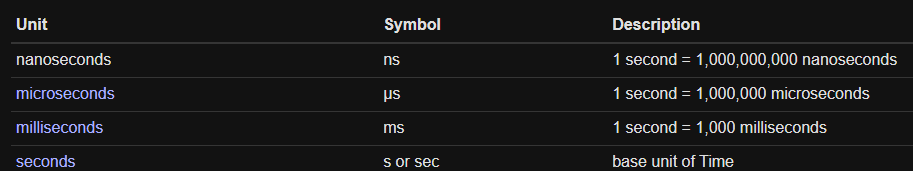

### Iter Tuples

In [36]:
bb_ARI_df = baseball_df[baseball_df['Team']=='ARI']
bb_ARI_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,RD_DF
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46,46
30,ARI,NL,2011,731,662,94,0.322,0.413,0.250,1,5.0,4.0,162,0.316,0.409,69,69
60,ARI,NL,2010,713,836,65,0.325,0.416,0.250,0,NaN,NaN,162,0.340,0.448,-123,-123
90,ARI,NL,2009,720,782,70,0.324,0.418,0.253,0,NaN,NaN,162,0.330,0.419,-62,-62
120,ARI,NL,2008,720,706,82,0.327,0.415,0.251,0,NaN,NaN,162,0.318,0.398,14,14


In [37]:
for rec in bb_ARI_df.itertuples():
  print(rec)

Pandas(Index=0, Team='ARI', League='NL', Year=2012, RS=734, RA=688, W=81, OBP=0.328, SLG=0.418, BA=0.259, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.317, OSLG=0.415, RD=46, RD_DF=46)
Pandas(Index=30, Team='ARI', League='NL', Year=2011, RS=731, RA=662, W=94, OBP=0.322, SLG=0.413, BA=0.25, Playoffs=1, RankSeason=5.0, RankPlayoffs=4.0, G=162, OOBP=0.316, OSLG=0.409, RD=69, RD_DF=69)
Pandas(Index=60, Team='ARI', League='NL', Year=2010, RS=713, RA=836, W=65, OBP=0.325, SLG=0.416, BA=0.25, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.34, OSLG=0.448, RD=-123, RD_DF=-123)
Pandas(Index=90, Team='ARI', League='NL', Year=2009, RS=720, RA=782, W=70, OBP=0.324, SLG=0.418, BA=0.253, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.33, OSLG=0.419, RD=-62, RD_DF=-62)
Pandas(Index=120, Team='ARI', League='NL', Year=2008, RS=720, RA=706, W=82, OBP=0.327, SLG=0.415, BA=0.251, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.318, OSLG=0.398, RD=14, RD_

In [38]:
for rec in bb_ARI_df.itertuples():
  if rec.Playoffs == 1:
    print(f'{rec.Index} - {rec.Year} - {rec.W}')

30 - 2011 - 94
150 - 2007 - 90
301 - 2002 - 98
331 - 2001 - 92
391 - 1999 - 100


In [41]:
for rec in baseball_df[baseball_df['Team']=='NYY'].itertuples():
  print(f'{rec.Year} ==> {rec.RS} - {rec.RA} == {rec.RS-rec.RA}')

2012 ==> 804 - 668 == 136
2011 ==> 867 - 657 == 210
2010 ==> 859 - 693 == 166
2009 ==> 915 - 753 == 162
2008 ==> 789 - 727 == 62
2007 ==> 968 - 777 == 191
2006 ==> 930 - 767 == 163
2005 ==> 886 - 789 == 97
2004 ==> 897 - 808 == 89
2003 ==> 877 - 716 == 161
2002 ==> 897 - 697 == 200
2001 ==> 804 - 713 == 91
2000 ==> 871 - 814 == 57
1999 ==> 900 - 731 == 169
1998 ==> 965 - 656 == 309
1997 ==> 891 - 688 == 203
1996 ==> 871 - 787 == 84
1993 ==> 821 - 761 == 60
1992 ==> 733 - 746 == -13
1991 ==> 674 - 777 == -103
1990 ==> 603 - 749 == -146
1989 ==> 698 - 792 == -94
1988 ==> 772 - 748 == 24
1987 ==> 788 - 758 == 30
1986 ==> 797 - 738 == 59
1985 ==> 839 - 660 == 179
1984 ==> 758 - 679 == 79
1983 ==> 770 - 703 == 67
1982 ==> 709 - 716 == -7
1980 ==> 820 - 662 == 158
1979 ==> 734 - 672 == 62
1978 ==> 735 - 582 == 153
1977 ==> 831 - 651 == 180
1976 ==> 730 - 575 == 155
1975 ==> 681 - 588 == 93
1974 ==> 671 - 623 == 48
1973 ==> 641 - 610 == 31
1971 ==> 648 - 641 == 7
1970 ==> 680 - 612 == 68
1969

### Pandas alternative to looping

<div>
  <img  src='./Images/data-frame-axes.png'
        width='400'
  />
</div>

In [93]:
srs_a = {
  'a':[1,     2, np.nan,np.nan,5],
  'b':[np.nan,2, 3,     np.nan,5]
}

In [94]:
df = pd.DataFrame(srs_a)#.reset_index()
# df.columns = ['a', 'b']
df

,a,b
0,1.0,NaN
1,2.0,2.0
2,NaN,3.0
3,NaN,NaN
4,5.0,5.0


In [99]:
df.dropna()

,a,b
1,2.0,2.0
4,5.0,5.0


In [102]:
df.dropna(axis=0, how='any') #Look across Rows

,a,b
1,2.0,2.0
4,5.0,5.0


In [106]:
df.dropna(axis=1, how='any') #Look down columns

""
0
1
2
3
4


In [97]:
baseball_df.head(2)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,RD_DF
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100,100


In [45]:
baseball_df[['RS','RA']].apply(sum, axis=1)

0       1422
1       1300
2       1417
3       1540
4       1372
        ... 
1227    1464
1228    1332
1229    1568
1230    1438
1231    1315
Length: 1232, dtype: int64

In [107]:
baseball_df[['RS','RA','W']].apply(sum, axis=0)

RS    880981
RA    880981
W      99674
dtype: int64

In [108]:
baseball_df['P_offs'] = baseball_df.apply(lambda rec: 'Yes' if rec['Playoffs']==1 else 'No', axis=1)
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,RD_DF,P_offs
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46,46,No
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100,100,Yes
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7,7,Yes
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72,-72,No
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146,-146,No


### Optimal Pandas Iterating

In [109]:
%%timeit
baseball_df['RD_NP'] = baseball_df['RS'].values - baseball_df['RA'].values

98.3 µs ± 7.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [110]:
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD,RD_DF,P_offs,RD_NP
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46,46,No,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100,100,Yes,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7,7,Yes,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72,-72,No,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146,-146,No,-146
